# Python data analysis and plotting for SRAM data remanence

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

import serial_analysis as sa


def show_binary_image_from_file(ax, file_name_in, img_width: int, img_height: int):
    with open(file_name_in, "rb") as file_in:
        bit_array = sa.file_read_image(file_in, img_width, img_height)
        show_binary_image_from_data(ax, bit_array)


def show_binary_image_from_data(ax, ndarray):
    '''A "binary image" is a black-and-white only 2D image (no grayscale) and this function displays one'''
    ax.set_xticks([])
    ax.set_yticks([])
    # These 'if' tests are only needed because otherwise an all-white image shows up as all-black for some reason
    # (thanks, matplotlib)
    if len(unique_arr := np.unique(ndarray)) == 1:
        if unique_arr[0] == 1:
            ax.imshow(ndarray, matplotlib.colors.ListedColormap(['white']))
        else:
            ax.imshow(ndarray, matplotlib.colors.ListedColormap(['black']))
    else:
        # ideally, this is the only branch we need (but it is not, see the above comment)
        ax.imshow(ndarray, matplotlib.colors.ListedColormap(['black', 'white']))

In [2]:
img_width, img_height = 305, 450
img_words = round(img_width * img_height / 16)
print(img_words*16)

137248


## Load remanence data for the Mona Lisa image

In [3]:
# Mona Lisa image info
img_width, img_height = 305, 450
img_words = round(img_width * img_height / 16)
img_filename = r"Monalisa\test_monalisa_hex4.txt"

In [8]:

# load serial data dumps

# baseline differences between a chip's PUF and the Mona Lisa image
# (used for data normalization later)
baseline_90nm = sa.percent(sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", img_filename, num_words=img_words), img_words*16)
baseline_150nm = sa.percent(sa.bit_diff_files(r"..\chips\inh2\puf\gold-PUF.txt", img_filename, num_words=img_words), img_words*16)
baseline_250nm = sa.percent(sa.bit_diff_files(r"..\chips\inh3\puf\gold-PUF.txt", img_filename, num_words=img_words), img_words*16)

# compute file differences from monalisa data for each remanence experiment file
data_90nm_1 = sa.diff_puf_and_trials_dump(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-1.txt", num_words=img_words)
data_90nm_2 = sa.diff_puf_and_trials_dump(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-2.txt", num_words=img_words)
data_90nm_3 = sa.diff_puf_and_trials_dump(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-3.txt", num_words=img_words)
data_150nm_1 = sa.diff_puf_and_trials_dump(img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-1.txt", num_words=img_words)
data_150nm_2 = sa.diff_puf_and_trials_dump(img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-2.txt", num_words=img_words)
data_250nm_1 = sa.diff_puf_and_trials_dump(img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-1.txt", num_words=img_words)
data_250nm_2 = sa.diff_puf_and_trials_dump(img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-2.txt", num_words=img_words)

# combine file data into arrays, one for each type
data_90nm = np.array(sorted(data_90nm_1 + data_90nm_2 + data_90nm_3))
data_150nm = np.array(sorted(data_150nm_1 + data_150nm_2))
data_250nm = np.array(sorted(data_250nm_1 + data_250nm_2))

# clean up intermediate variables
del data_90nm_1, data_90nm_2, data_90nm_3
del data_150nm_1, data_150nm_2
del data_250nm_1, data_250nm_2

Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and 'Monalisa\test_monalisa_hex4.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 42,687 (1.018%)
* Hamming weight for "Monalisa\test_monalisa_hex4.txt": 72,593 (1.731%)
* Number of bits different between the two files: 70,130 which is 51.097% of the given total size
Comparing bits from data files '..\chips\inh2\puf\gold-PUF.txt' and 'Monalisa\test_monalisa_hex4.txt'...
* Hamming weight for "..\chips\inh2\puf\gold-PUF.txt": 68,409 (1.631%)
* Hamming weight for "Monalisa\test_monalisa_hex4.txt": 72,593 (1.731%)
* Number of bits different between the two files: 69,084 which is 50.335% of the given total size
Comparing bits from data files '..\chips\inh3\puf\gold-PUF.txt' and 'Monalisa\test_monalisa_hex4.txt'...
* Hamming weight for "..\chips\inh3\puf\gold-PUF.txt": 45,089 (1.075%)
* Hamming weight for "Monalisa\test_monalisa_hex4.txt": 72,593 (1.731%)
* Number of bits different between the two files: 70,556 whi

## Similarity graph of SRAM startup values to the original Mona Lisa image

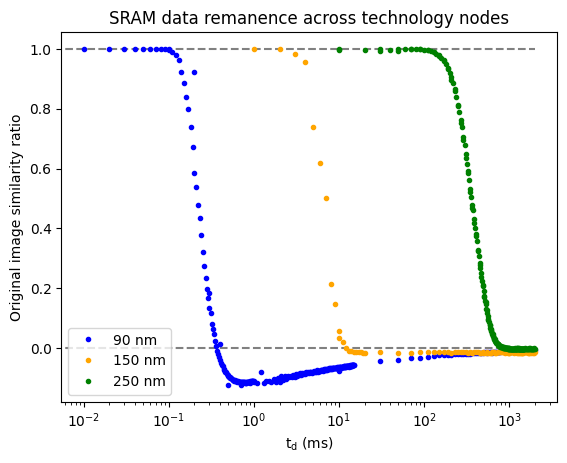

In [9]:
fig, ax = plt.subplots()
ax.set_title("SRAM data remanence across technology nodes")
ax.set_ylabel("Original image similarity ratio")
ax.set_xlabel(r"$\mathregular{t_d}$ (ms)")
ax.set_xscale('log')
# ax.set_xlim([10e-4, 10e3])

# ax.plot([0, 10e4], [baseline_90nm, baseline_90nm], '--', color='blue', label="90nm baseline")
# ax.plot([0, 10e4], [baseline_150nm, baseline_150nm], '--', color='orange', label="150nm baseline")
# ax.plot([0, 10e4], [baseline_250nm, baseline_250nm], '--', color='green', label="150nm baseline")

ax.plot([0, 2e3], [1.0, 1.0], '--', color='gray')
ax.plot([0, 2e3], [0.0, 0.0], '--', color='gray')

# graph normalized difference using the baseline
ax.plot(data_90nm[:,0], 1 - data_90nm[:,1]/baseline_90nm, '.', color='blue', label="90 nm")
ax.plot(data_150nm[:,0], 1 - data_150nm[:,1]/baseline_150nm, '.', color='orange', label="150 nm")
ax.plot(data_250nm[:,0], 1 - data_250nm[:,1]/baseline_250nm, '.', color='green', label="250 nm")

ax.legend(loc='lower left')

## Visualizing the start-up SRAM values as images

In [4]:
import math

def fig_image_remanence_row(original_image_filename: str, img_width: int, img_height: int, captures_filename: str, list_delays: list[float]):
    '''Show a matplotlib figure with a bunch of images from an Arduino Due SRAM remanence experiment memory dump file.'''
    img_bits = img_width * img_height
    img_words = math.ceil(img_bits / 16)

    fig, axs = plt.subplots(1, len(list_delays) + 1)

    # add a display of the original, pristine, image
    hw = sa.file_hamming_weight(original_image_filename, img_words)
    axs[0].set_title("Original")
    axs[0].set_xlabel(f"HW = {sa.percent(hw, img_bits):0.2f}%")
    show_binary_image_from_file(axs[0], original_image_filename, img_width, img_height)
    
    # now show an image for each of the delays given
    for i, delay_ms in enumerate(list_delays):
        ax_i = axs[1 + i]
        try:
            words = sa.file_load_trial_for_delay(captures_filename, delay_ms)
            img_i = sa.convert_words_to_image(words, img_width, img_height)
            hw = sum(map(sa.hamming_weight, np.reshape(img_i, [img_bits])))
            show_binary_image_from_data(ax_i, img_i)
        except KeyError as e:
            fig.clear()
            raise KeyError(f"The 'images_dict' does not have an entry for {delay_ms}")
        
        ax_i.set_title(f"{delay_ms} ms")
        ax_i.set_xlabel(f"HW = {sa.percent(hw, img_bits):0.2f}%")

    return fig, axs

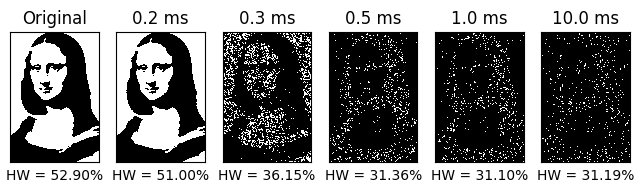

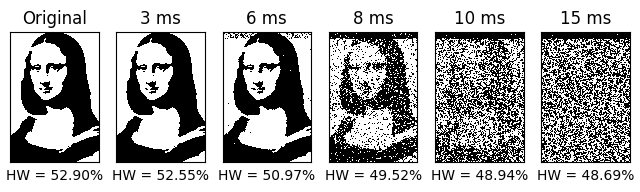

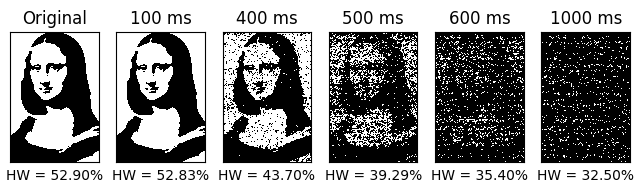

In [13]:
fig_image_remanence_row(img_filename, img_width, img_height,
                        r"..\serial-data\inh1-90nm-monalisa-remanence-1.txt",
                        [0.2, 0.3, 0.5, 1.0, 10.0])[0].set_figwidth(8)

fig_image_remanence_row(img_filename, img_width, img_height,
                        r"..\serial-data\inh2-150nm-monalisa-remanence-1.txt",
                        [3, 6, 8, 10, 15])[0].set_figwidth(8)

fig_image_remanence_row(img_filename, img_width, img_height,
                        r"..\serial-data\inh3-250nm-monalisa-remanence-1.txt",
                        [100, 400, 500, 600, 1000])[0].set_figwidth(8)

In [10]:
from math import ceil

def fig_image_remanence_grid(original_image_filename: str, img_width: int, img_height: int, images_dict: dict, list_delays: list[float], num_columns: int = 10):
    '''Show a matplotlib figure with a bunch of images from an Arduino Due SRAM remanence experiment memory dump file.'''

    num_plots = 1 + len(list_delays)
    num_rows = ceil(num_plots / num_columns)

    fig, axs = plt.subplots(num_rows, num_columns)
    axs = np.reshape(axs, num_rows * num_columns)

    # add a display of the original, pristine, image
    axs[0].set_title("Original")
    show_binary_image_from_file(axs[0], original_image_filename, img_width, img_height)
    
    # now show an image for each of the delays given
    for i, delay_ms in enumerate(list_delays):
        axs[1 + i].set_title(f"{delay_ms} ms")
        try:
            show_binary_image_from_data(axs[1 + i], images_dict[delay_ms])
        except KeyError as e:
            fig.clear()
            raise KeyError(f"The 'images_dict' does not have an entry for {delay_ms}")
        
    return fig

def show_all_images(img_filename, images_dict, **kwargs):
    h, w = np.shape(images_dict[0.0])
    fig = fig_image_remanence_grid(img_filename, w, h, images_dict, images_dict.keys(), **kwargs)
    fig.set_figheight(24)
    fig.set_figwidth(12)
    return fig

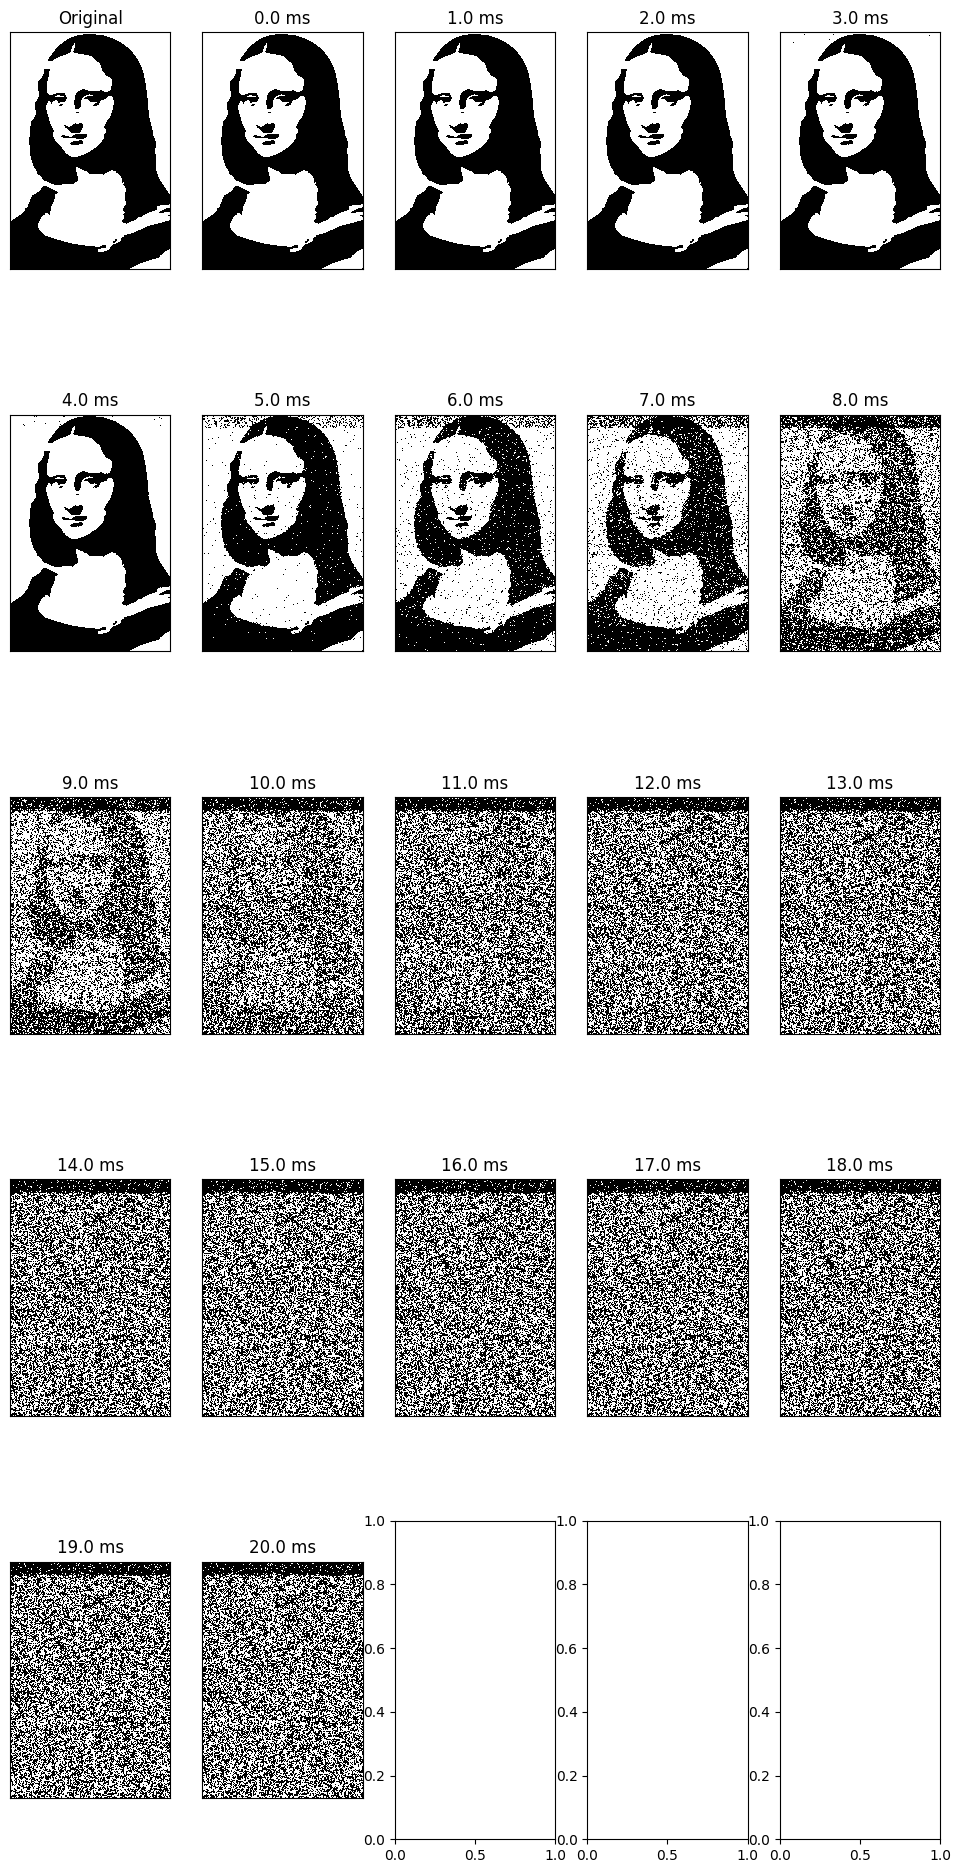

In [10]:
images_90nm = sa.remanence_experiment_get_images(r"..\serial-data\inh1-90nm-monalisa-remanence-1.txt", img_width, img_height)
images_150nm = sa.remanence_experiment_get_images(r"..\serial-data\inh2-150nm-monalisa-remanence-1.txt", img_width, img_height)
images_250nm = sa.remanence_experiment_get_images(r"..\serial-data\inh3-250nm-monalisa-remanence-1.txt", img_width, img_height)

fig = show_all_images(img_filename, images_150nm, num_columns=5)

## Below are images of the first few PUF values for each of the chips

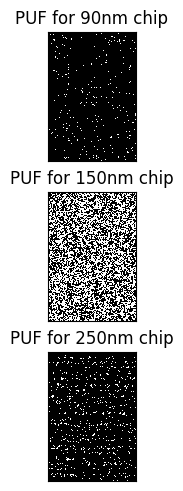

In [11]:
fig_puf, axs_puf = plt.subplots(3, 1, constrained_layout=True)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4)

axs_puf[0].set_title("PUF for 90nm chip")
show_binary_image_from_file(axs_puf[0], r"..\chips\inh1\puf\gold-PUF.txt", img_width, img_height)

axs_puf[1].set_title("PUF for 150nm chip")
show_binary_image_from_file(axs_puf[1], r"..\chips\inh2\puf\gold-PUF.txt", img_width, img_height)

axs_puf[2].set_title("PUF for 250nm chip")
show_binary_image_from_file(axs_puf[2], r"..\chips\inh3\puf\gold-PUF.txt", img_width, img_height)

## Remanence data with an all-zeros image

### Create an all-zeros image file

In [4]:
img_width = img_height = 512
img_bits = img_width * img_height
img_words = img_bits // 16
zeros_img_filename = f"all-zeros-{img_width}x{img_height}.txt"

with open(zeros_img_filename, "w") as file_write:
    for i in range(img_words):
        print(sa.hex4(0), file=file_write, end='')

### Get baseline difference between PUF and the zeros image

In [13]:
zeros_baseline_90nm = sa.percent(sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", zeros_img_filename, num_words=img_words), img_words*16)
zeros_baseline_150nm = sa.percent(sa.bit_diff_files(r"..\chips\inh2\puf\gold-PUF.txt", zeros_img_filename, num_words=img_words), img_words*16)
zeros_baseline_250nm = sa.percent(sa.bit_diff_files(r"..\chips\inh3\puf\gold-PUF.txt", zeros_img_filename, num_words=img_words), img_words*16)

Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and 'all-zeros-512x512.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 77,148 (1.839%)
* Hamming weight for "all-zeros-512x512.txt": 0 (0.000%)
* Number of bits different between the two files: 77,148 which is 29.430% of the given total size
Comparing bits from data files '..\chips\inh2\puf\gold-PUF.txt' and 'all-zeros-512x512.txt'...
* Hamming weight for "..\chips\inh2\puf\gold-PUF.txt": 131,242 (3.129%)
* Hamming weight for "all-zeros-512x512.txt": 0 (0.000%)
* Number of bits different between the two files: 131,242 which is 50.065% of the given total size
Comparing bits from data files '..\chips\inh3\puf\gold-PUF.txt' and 'all-zeros-512x512.txt'...
* Hamming weight for "..\chips\inh3\puf\gold-PUF.txt": 86,619 (2.065%)
* Hamming weight for "all-zeros-512x512.txt": 0 (0.000%)
* Number of bits different between the two files: 86,619 which is 33.043% of the given total size


### Graph remanence over time for the zeros image

In [14]:
data_90nm_zeros = sa.diff_puf_and_trials_dump(zeros_img_filename, r"..\serial-data\inh1-90nm-zeros-remanence-1.txt", num_words=img_words)
data_150nm_zeros = sa.diff_puf_and_trials_dump(zeros_img_filename, r"..\serial-data\inh2-150nm-zeros-remanence-1.txt", num_words=img_words)
data_250nm_zeros = sa.diff_puf_and_trials_dump(zeros_img_filename, r"..\serial-data\inh3-250nm-zeros-remanence-1.txt", num_words=img_words)

Diffing file "all-zeros-512x512.txt" against trials file "..\serial-data\inh1-90nm-zeros-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
Diffing file "all-zeros-512x512.txt" against trials file "..\serial-data\inh2-150nm-zeros-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
Diffing file "all-zeros-512x512.txt" against trials file "..\serial-data\inh3-250nm-zeros-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 


In [15]:
data_90nm_zeros = np.array(data_90nm_zeros)
data_150nm_zeros = np.array(data_150nm_zeros)
data_250nm_zeros = np.array(data_250nm_zeros)

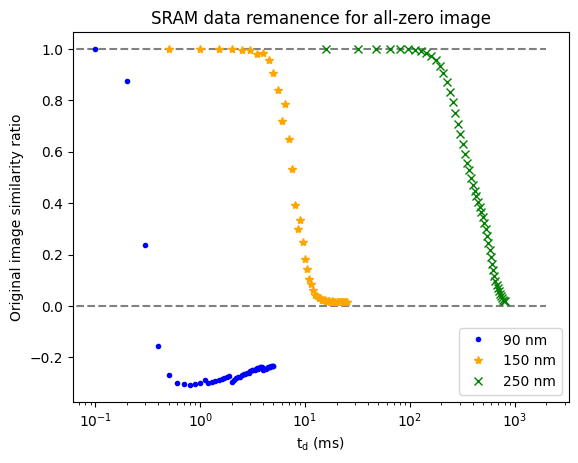

In [16]:
fig, ax = plt.subplots()
ax.set_title("SRAM data remanence for all-zero image")
ax.set_ylabel("Original image similarity ratio")
ax.set_xlabel(r"$\mathregular{t_d}$ (ms)")
ax.set_xscale('log')

ax.plot([0, 2e3], [1.0, 1.0], '--', color='gray')
ax.plot([0, 2e3], [0.0, 0.0], '--', color='gray')

# graph normalized difference using the baseline
ax.plot(data_90nm_zeros[:,0], 1 - data_90nm_zeros[:,1]/zeros_baseline_90nm, '.', color='blue', label="90 nm")
ax.plot(data_150nm_zeros[:,0], 1 - data_150nm_zeros[:,1]/zeros_baseline_150nm, '*', color='orange', label="150 nm")
ax.plot(data_250nm_zeros[:,0], 1 - data_250nm_zeros[:,1]/zeros_baseline_250nm, 'x', color='green', label="250 nm")

ax.legend(loc='lower right')

### Visualize the zeros image remanence

In [17]:
zeros_images_90nm = sa.remanence_experiment_get_images(r"..\serial-data\inh1-90nm-zeros-remanence-1.txt", img_width, img_height)
zeros_images_150nm = sa.remanence_experiment_get_images(r"..\serial-data\inh2-150nm-zeros-remanence-1.txt", img_width, img_height)
zeros_images_250nm = sa.remanence_experiment_get_images(r"..\serial-data\inh3-250nm-zeros-remanence-1.txt", img_width, img_height)

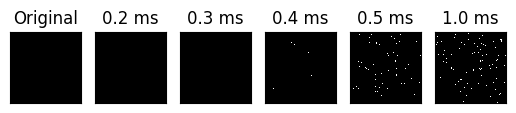

In [18]:
fig_image_remanence_row(zeros_img_filename, img_width, img_height, zeros_images_90nm, [0.2, 0.3, 0.4, 0.5, 1.0])

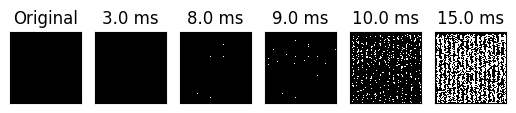

In [19]:
fig_image_remanence_row(zeros_img_filename, img_width, img_height, zeros_images_150nm, [3.0, 8.0, 9.0, 10.0, 15.0])

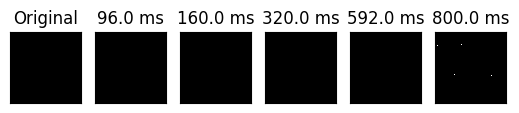

In [20]:
fig_image_remanence_row(zeros_img_filename, img_width, img_height, zeros_images_250nm, [96.0, 160.0, 320.0, 592.0, 800.0])

### Below are the 512x512 PUF images for the chips

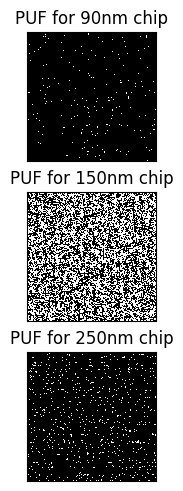

In [21]:
fig_puf, axs_puf = plt.subplots(3, 1, constrained_layout=True)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4)

axs_puf[0].set_title("PUF for 90nm chip")
show_binary_image_from_file(axs_puf[0], r"..\chips\inh1\puf\gold-PUF.txt", img_width, img_height)

axs_puf[1].set_title("PUF for 150nm chip")
show_binary_image_from_file(axs_puf[1], r"..\chips\inh2\puf\gold-PUF.txt", img_width, img_height)

axs_puf[2].set_title("PUF for 250nm chip")
show_binary_image_from_file(axs_puf[2], r"..\chips\inh3\puf\gold-PUF.txt", img_width, img_height)

## Remanence for all-one image

In [29]:
img_width = img_height = 512
img_bits = img_width * img_height
img_words = img_bits // 16
ones_img_filename = f"all-ones-{img_width}x{img_height}.txt"

# create data image file to be all 0xFFFF
with open(ones_img_filename, "w") as file_write:
    for i in range(img_words):
        print(sa.hex4(0xffff), file=file_write, end='')

# memory data dump file names
ones_90nm_dump  = r"..\serial-data\inh1-90nm-ones-remanence-1.txt"
ones_150nm_dump = r"..\serial-data\inh2-150nm-ones-remanence-1.txt"
ones_250nm_dump = r"..\serial-data\inh3-250nm-ones-remanence-1.txt"

In [ ]:
ones_baseline_90nm = sa.percent(sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", ones_img_filename, num_words=img_words), img_bits)
ones_baseline_150nm = sa.percent(sa.bit_diff_files(r"..\chips\inh2\puf\gold-PUF.txt", ones_img_filename, num_words=img_words), img_bits)
ones_baseline_250nm = sa.percent(sa.bit_diff_files(r"..\chips\inh3\puf\gold-PUF.txt", ones_img_filename, num_words=img_words), img_bits)

In [23]:
data_90nm_ones = np.array(sa.diff_puf_and_trials_dump(ones_img_filename, ones_90nm_dump, num_words=img_words))
data_150nm_ones = np.array(sa.diff_puf_and_trials_dump(ones_img_filename, ones_150nm_dump, num_words=img_words))
data_250nm_ones = np.array(sa.diff_puf_and_trials_dump(ones_img_filename, ones_250nm_dump, num_words=img_words))

Diffing file "all-ones-512x512.txt" against trials file "..\serial-data\inh1-90nm-ones-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
Diffing file "all-ones-512x512.txt" against trials file "..\serial-data\inh2-150nm-ones-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
Diffing file "all-ones-512x512.txt" against trials file "..\serial-data\inh3-250nm-ones-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 


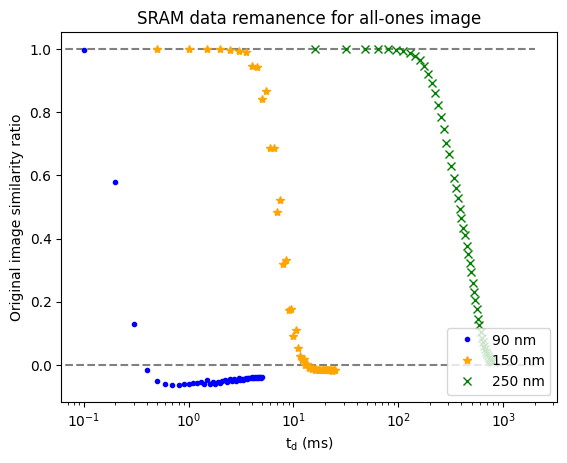

In [24]:
fig, ax = plt.subplots()
ax.set_title("SRAM data remanence for all-ones image")
ax.set_ylabel("Original image similarity ratio")
ax.set_xlabel(r"$\mathregular{t_d}$ (ms)")
ax.set_xscale('log')

ax.plot([0, 2e3], [1.0, 1.0], '--', color='gray')
ax.plot([0, 2e3], [0.0, 0.0], '--', color='gray')

# graph normalized difference using the baseline
ax.plot(data_90nm_ones[:,0], 1 - data_90nm_ones[:,1]/ones_baseline_90nm, '.', color='blue', label="90 nm")
ax.plot(data_150nm_ones[:,0], 1 - data_150nm_ones[:,1]/ones_baseline_150nm, '*', color='orange', label="150 nm")
ax.plot(data_250nm_ones[:,0], 1 - data_250nm_ones[:,1]/ones_baseline_250nm, 'x', color='green', label="250 nm")

ax.legend(loc='lower right')

In [25]:
ones_images_90nm = sa.remanence_experiment_get_images(ones_90nm_dump, img_width, img_height)
ones_images_150nm = sa.remanence_experiment_get_images(ones_150nm_dump, img_width, img_height)
ones_images_250nm = sa.remanence_experiment_get_images(ones_250nm_dump, img_width, img_height)

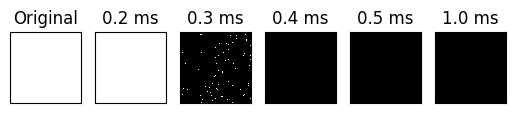

In [26]:
fig_image_remanence_row(ones_img_filename, img_width, img_height, ones_images_90nm, [0.2, 0.3, 0.4, 0.5, 1.0])

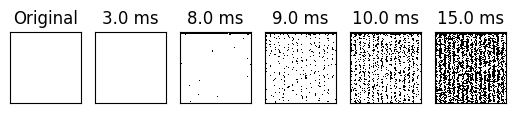

In [27]:
fig_image_remanence_row(ones_img_filename, img_width, img_height, ones_images_150nm, [3.0, 8.0, 9.0, 10.0, 15.0])

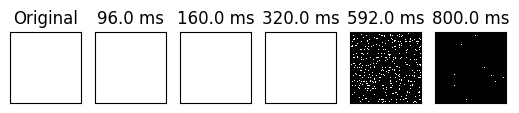

In [28]:
fig_image_remanence_row(ones_img_filename, img_width, img_height, ones_images_250nm, [96.0, 160.0, 320.0, 592.0, 800.0])

## 90nm with Temperature variation

In [1]:
import numpy as np

import serial_analysis as sa

# Mona Lisa image info
img_width, img_height = 305, 450
img_words = round((img_width * img_height) / 16)
monalisa_img_filename = r"Monalisa\test_monalisa_hex4.txt"

print(f"{img_words=}")

baseline_90nm = sa.percent(sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", monalisa_img_filename, num_words=img_words), img_words*16)
baseline_150nm = sa.percent(sa.bit_diff_files(r"..\chips\inh2\puf\gold-PUF.txt", monalisa_img_filename, num_words=img_words), img_words*16)
baseline_250nm = sa.percent(sa.bit_diff_files(r"..\chips\inh3\puf\gold-PUF.txt", monalisa_img_filename, num_words=img_words), img_words*16)

img_words=8578
Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and 'Monalisa\test_monalisa_hex4.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 40,478 (0.965%)
* Hamming weight for "Monalisa\test_monalisa_hex4.txt": 72,593 (1.731%)
* Number of bits different between the two files: 70,239 which is 51.177% of the given total size
Comparing bits from data files '..\chips\inh2\puf\gold-PUF.txt' and 'Monalisa\test_monalisa_hex4.txt'...
* Hamming weight for "..\chips\inh2\puf\gold-PUF.txt": 69,008 (1.645%)
* Hamming weight for "Monalisa\test_monalisa_hex4.txt": 72,593 (1.731%)
* Number of bits different between the two files: 68,853 which is 50.167% of the given total size
Comparing bits from data files '..\chips\inh3\puf\gold-PUF.txt' and 'Monalisa\test_monalisa_hex4.txt'...
* Hamming weight for "..\chips\inh3\puf\gold-PUF.txt": 45,003 (1.073%)
* Hamming weight for "Monalisa\test_monalisa_hex4.txt": 72,593 (1.731%)
* Number of bits different between the two fi

In [30]:
data_90nm = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-1.txt", num_words=img_words))
data_90nm_0c = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-4-temp-0c.txt", num_words=img_words))
data_90nm_n10c = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-5-temp-minus10c.txt", num_words=img_words))
data_90nm_n5c = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-6-temp-minus5c.txt", num_words=img_words))
data_90nm_n15c = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-7-temp-minus15c.txt", num_words=img_words))

Diffing file "Monalisa\test_monalisa_hex4.txt" against trials file "..\serial-data\inh1-90nm-monalisa-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 
Diffing file "Monalisa\test_monalisa_hex4.txt" against trials file "..\serial-data\inh1-90nm-monalisa-remanence-4-temp-0c.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
Diffing file "Monalisa\test_monalisa_hex4.txt" against trials file "..\serial-data\inh1-90nm-monalisa-remanence-

In [6]:
data_150nm = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-1.txt", num_words=img_words))
data_150nm_0c = np.array(sorted(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-2-temp-0c.txt", num_words=img_words)
                         + sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-3-temp-0c.txt", num_words=img_words)))
data_150nm_n5c = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-4-temp-minus5c.txt", num_words=img_words))
data_150nm_n10c = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-5-temp-minus10c.txt", num_words=img_words))
data_150nm_n15c = np.array(sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-6-temp-minus15c.txt", num_words=img_words))

Diffing file "Monalisa\test_monalisa_hex4.txt" against trials file "..\serial-data\inh2-150nm-monalisa-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 
Diffing file "Monalisa\test_monalisa_hex4.txt" against trials file "..\serial-data\inh2-150nm-monalisa-remanence-2-temp-0c.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 


NameError: name 'data_90nm' is not defined

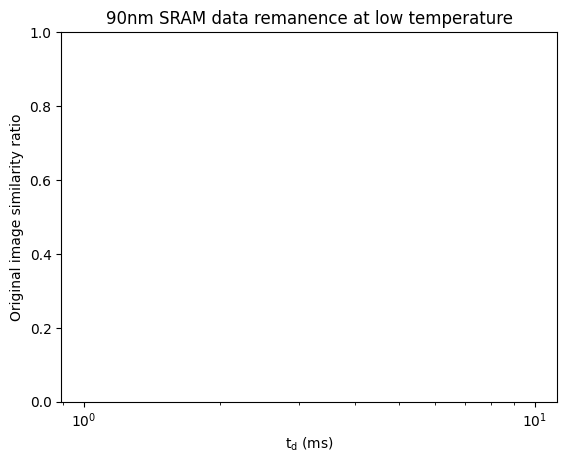

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.set_title("90nm SRAM data remanence at low temperature")
ax.set_ylabel("Original image similarity ratio")
ax.set_xlabel(r"$\mathregular{t_d}$ (ms)")
ax.set_xscale('log')

ax.plot(data_90nm[:,0], 1 - data_90nm[:,1]/baseline_90nm, label="baseline")
ax.plot(data_90nm_0c[:,0], 1 - data_90nm_0c[:,1]/baseline_90nm, '--', label="0 C")
ax.plot(data_90nm_n5c[:,0], 1 - data_90nm_n5c[:,1]/baseline_90nm, '--', label="-5 C")
ax.plot(data_90nm_n10c[:,0], 1 - data_90nm_n10c[:,1]/baseline_90nm, '--', label="-10 C")
ax.plot(data_90nm_n15c[:,0], 1 - data_90nm_n15c[:,1]/baseline_90nm, '--', label="-15 C")

ax.legend(loc='upper right')


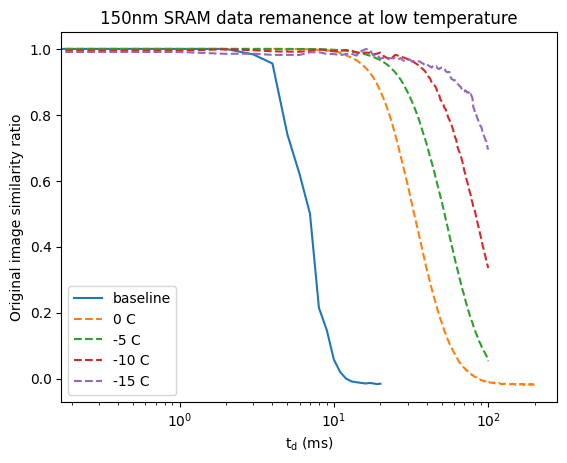

In [9]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.set_title("150nm SRAM data remanence at low temperature")
ax.set_ylabel("Original image similarity ratio")
ax.set_xlabel(r"$\mathregular{t_d}$ (ms)")
ax.set_xscale('log')

ax.plot(data_150nm[:,0], 1 - data_150nm[:,1]/baseline_150nm, label="baseline")
ax.plot(data_150nm_0c[:,0], 1 - data_150nm_0c[:,1]/baseline_150nm, '--', label="0 C")
ax.plot(data_150nm_n5c[:,0], 1 - data_150nm_n5c[:,1]/baseline_150nm, '--', label="-5 C")
ax.plot(data_150nm_n10c[:,0], 1 - data_150nm_n10c[:,1]/baseline_150nm, '--', label="-10 C")
ax.plot(data_150nm_n15c[:,0], 1 - data_150nm_n15c[:,1]/baseline_150nm, '--', label="-15 C")

ax.legend(loc='lower left')


In [32]:
import numpy as np
from matplotlib import pyplot as plt
import serial_analysis as sa

# Mona Lisa image info
img_width, img_height = 305, 450
img_words = round((img_width * img_height) / 16)
monalisa_img_filename = r"Monalisa\test_monalisa_hex4.txt"

data_250 = np.array(
    sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-1.txt", num_words=img_words)
    + sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-2.txt", num_words=img_words))

data_250_minus15c = np.array(
    sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-3-minus15c.txt", num_words=img_words)
    + sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-4-minus15c.txt", num_words=img_words)
    + sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-5-minus15c.txt", num_words=img_words)
    + sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-6-minus15c.txt", num_words=img_words)
    + sa.diff_puf_and_trials_dump(monalisa_img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-7-minus15c.txt", num_words=img_words))

Diffing file "Monalisa\test_monalisa_hex4.txt" against trials file "..\serial-data\inh3-250nm-monalisa-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 
Diffing file "Monalisa\test_monalisa_hex4.txt" against trials file "..\serial-data\inh3-250nm-monalisa-remanence-2.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91

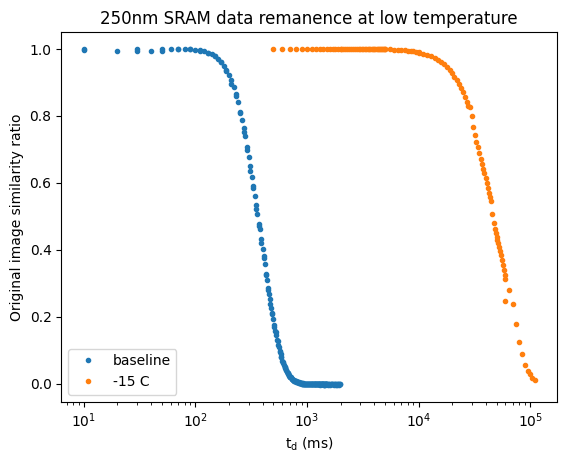

In [33]:
fig, ax = plt.subplots()
ax.set_title("250nm SRAM data remanence at low temperature")
ax.set_ylabel("Original image similarity ratio")
ax.set_xlabel(r"$\mathregular{t_d}$ (ms)")
ax.set_xscale('log')
ax.plot(data_250[:,0], 1 - data_250[:,1]/baseline_250nm, '.', label="baseline")
ax.plot(data_250_minus15c[:,0], 1 - data_250_minus15c[:,1]/baseline_250nm, '.', label="-15 C")
ax.legend(loc='lower left')

## Comparison of all-0 and all-1 for 90nm chip

In [17]:
import numpy as np
import serial_analysis as sa
from matplotlib import pyplot as plt

img_width = img_height = 512
img_bits = img_width * img_height
img_words = img_bits // 16
zeros_img_filename = f"all-zeros-{img_width}x{img_height}.txt"
ones_img_filename = f"all-ones-{img_width}x{img_height}.txt"

In [18]:
zeros_baseline_90nm = sa.percent(sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", zeros_img_filename, num_words=img_words), img_words*16)
ones_baseline_90nm = sa.percent(sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", ones_img_filename, num_words=img_words), img_words*16)

data_90nm_zeros = sa.diff_puf_and_trials_dump(zeros_img_filename, r"..\serial-data\inh1-90nm-zeros-remanence-1.txt", num_words=img_words)
data_90nm_ones = sa.diff_puf_and_trials_dump(ones_img_filename, r"..\serial-data\inh1-90nm-ones-remanence-1.txt", num_words=img_words)

data_90nm_zeros = np.array(data_90nm_zeros)
data_90nm_ones = np.array(data_90nm_ones)

Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and 'all-zeros-512x512.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 77,148 (1.839%)
* Hamming weight for "all-zeros-512x512.txt": 0 (0.000%)
* Number of bits different between the two files: 77,148 which is 29.430% of the given total size
Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and 'all-ones-512x512.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 77,148 (1.839%)
* Hamming weight for "all-ones-512x512.txt": 262,144 (6.250%)
* Number of bits different between the two files: 184,996 which is 70.570% of the given total size
Diffing file "all-zeros-512x512.txt" against trials file "..\serial-data\inh1-90nm-zeros-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
Diffing file "all-ones-512x512.txt" against trials file "..\serial-data\inh1-90nm-ones-remanence-1.txt

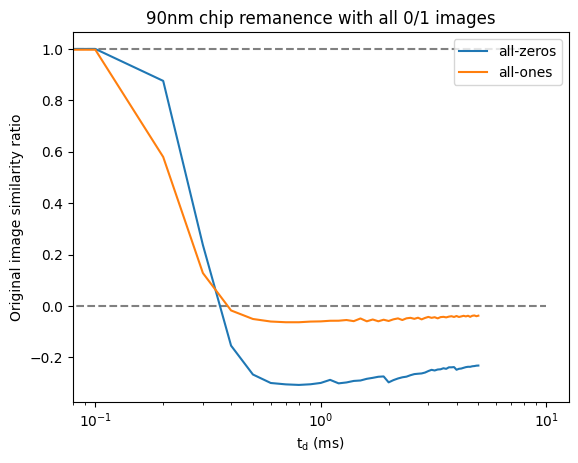

In [36]:
fig, ax = plt.subplots()
ax.set_title("90nm chip remanence with all 0/1 images")
ax.set_ylabel("Original image similarity ratio")
ax.set_xlabel(r"$\mathregular{t_d}$ (ms)")
ax.set_xscale('log')

ax.plot([0, 10], [1.0, 1.0], '--', color='gray')
ax.plot([0, 10], [0.0, 0.0], '--', color='gray')

# graph normalized difference using the baseline
ax.plot(data_90nm_zeros[:,0], 1 - data_90nm_zeros[:,1]/zeros_baseline_90nm, label="all-zeros")
ax.plot(data_90nm_ones[:,0], 1 - data_90nm_ones[:,1]/ones_baseline_90nm, label="all-ones")
# ax.plot(data_90nm_zeros[:,0], abs( (1 - data_90nm_zeros[:,1]/zeros_baseline_90nm) - (1 - data_90nm_ones[:,1]/ones_baseline_90nm) ), label="difference")

ax.legend(loc='upper right')

## Re-do the Mona Lisa image difference from PUF graphs

In [94]:
# load serial data dumps

# Mona Lisa image info
img_width, img_height = 305, 450
img_words = round(img_width * img_height / 16)
img_filename = r"..\Monalisa\test_monalisa_hex4.txt"

puf_90nm_filename = r"..\chips\inh1\puf\gold-PUF.txt"
puf_150nm_filename = r"..\chips\inh2\puf\gold-PUF.txt"
puf_250nm_filename = r"..\chips\inh3\puf\gold-PUF.txt"

# compute file differences from PUF for each remanence experiment file...

data_90nm_1 = sa.diff_puf_and_trials_dump(puf_90nm_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-1.txt", num_words=img_words)
data_90nm_2 = sa.diff_puf_and_trials_dump(puf_90nm_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-2.txt", num_words=img_words)
data_90nm_3 = sa.diff_puf_and_trials_dump(puf_90nm_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-3.txt", num_words=img_words)

data_150nm_1 = sa.diff_puf_and_trials_dump(puf_150nm_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-1.txt", num_words=img_words)
data_150nm_2 = sa.diff_puf_and_trials_dump(puf_150nm_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-2.txt", num_words=img_words)

data_250nm_1 = sa.diff_puf_and_trials_dump(puf_250nm_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-1.txt", num_words=img_words)
data_250nm_2 = sa.diff_puf_and_trials_dump(puf_250nm_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-2.txt", num_words=img_words)

# combine data into arrays, one for each chip
data_90nm = np.array(sorted(data_90nm_1 + data_90nm_2 + data_90nm_3))
data_150nm = np.array(sorted(data_150nm_1 + data_150nm_2))
data_250nm = np.array(sorted(data_250nm_1 + data_250nm_2))

# remove the intermediate variables
del data_90nm_1, data_90nm_2, data_90nm_3
del data_150nm_1, data_150nm_2
del data_250nm_1, data_250nm_2

Diffing file "..\chips\inh1\puf\gold-PUF.txt" against trials file "..\serial-data\inh1-90nm-monalisa-remanence-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 
Diffing file "..\chips\inh1\puf\gold-PUF.txt" against trials file "..\serial-data\inh1-90nm-monalisa-remanence-2.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 

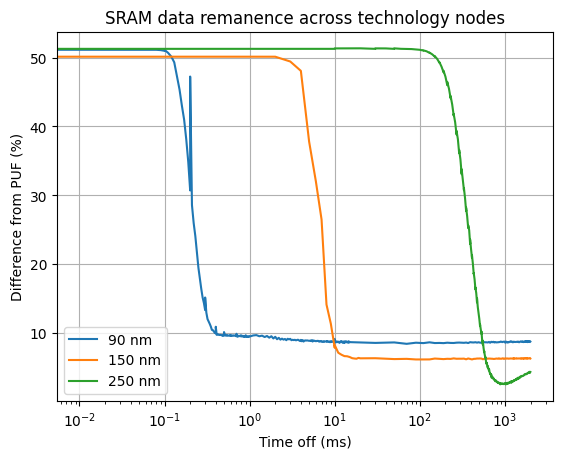

In [95]:
fig, ax = plt.subplots()
ax.set_title("SRAM data remanence across technology nodes")
ax.set_ylabel("Difference from PUF (%)")
ax.set_xlabel(r"Time off (ms)")
ax.set_xscale('log')
if False:
    ax.plot(data_90nm[:,0], data_90nm[:,1], '.', color='blue', label="90 nm")
    ax.plot(data_150nm[:,0], data_150nm[:,1], '*', color='orange', label="150 nm")
    ax.plot(data_250nm[:,0], data_250nm[:,1], 'x', color='green', label="250 nm")
else:
    ax.plot(data_90nm[:,0], data_90nm[:,1], label="90 nm")
    ax.plot(data_150nm[:,0], data_150nm[:,1], label="150 nm")
    ax.plot(data_250nm[:,0], data_250nm[:,1], label="250 nm")
ax.legend(loc='lower left')
# ax.grid()
plt.show()

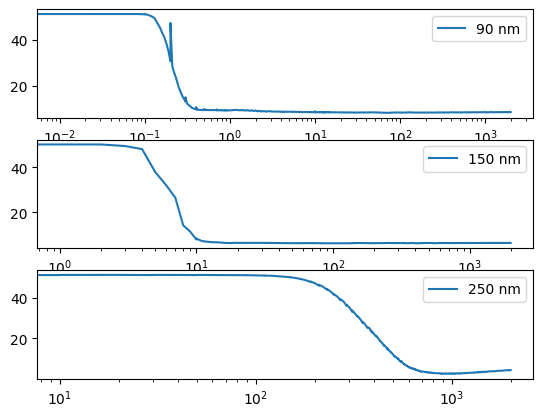

In [40]:
fig, axs = plt.subplots(3, 1)
# axs[0].set_title("SRAM data remanence for 90nm")
axs[0].plot(data_90nm[:,0], data_90nm[:,1], label="90 nm")
# axs[1].set_title("SRAM data remanence for 150nm")
axs[1].plot(data_150nm[:,0], data_150nm[:,1], label="150 nm")
# axs[2].set_title("SRAM data remanence for 250nm")
axs[2].plot(data_250nm[:,0], data_250nm[:,1], label="250 nm")
for ax in axs:
#     ax.set_ylabel("Difference from PUF (%)")
#     ax.set_xlabel(r"Time off (ms)")
    ax.set_xscale('log')
    ax.legend()
plt.show()

## Remanence value per each individual bit

In [19]:
img_width = img_height = 512
img_bits = img_width * img_height
img_words = img_bits // 16

ones_img_filename = f"all-ones-{img_width}x{img_height}.txt"
zeros_img_filename = f"all-zeros-{img_width}x{img_height}.txt"

ones_90nm_dump  = r"..\serial-data\inh1-90nm-ones-remanence-1.txt"
ones_150nm_dump = r"..\serial-data\inh2-150nm-ones-remanence-1.txt"
ones_250nm_dump = r"..\serial-data\inh3-250nm-ones-remanence-1.txt"

zeros_90nm_dump  = r"..\serial-data\inh1-90nm-zeros-remanence-1.txt"
zeros_150nm_dump = r"..\serial-data\inh2-150nm-zeros-remanence-1.txt"
zeros_250nm_dump = r"..\serial-data\inh3-250nm-zeros-remanence-1.txt"

In [20]:
def choose_dump_file(zero_or_one, node_size):
    # print(f"{zero_or_one=}, {node_size=}")
    return {
        'one': { 90: ones_90nm_dump, 150: ones_150nm_dump, 250: ones_250nm_dump, },
        'zero': { 90: zeros_90nm_dump, 150: zeros_150nm_dump, 250: zeros_250nm_dump, },
    }[zero_or_one][node_size]

Plotting 90nm
dump_file='..\\serial-data\\inh1-90nm-zeros-remanence-1.txt'
find_flip_bits()...
For the first data dump in this file, word_count=16400
Read 50 dumps
dump_file='..\\serial-data\\inh1-90nm-ones-remanence-1.txt'
find_flip_bits()...
For the first data dump in this file, word_count=16384


KeyboardInterrupt: 

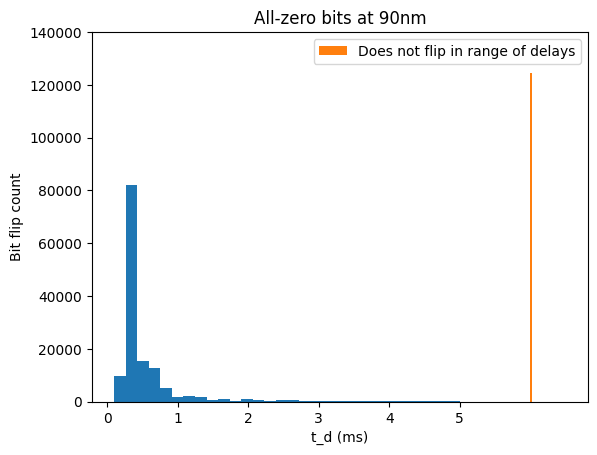

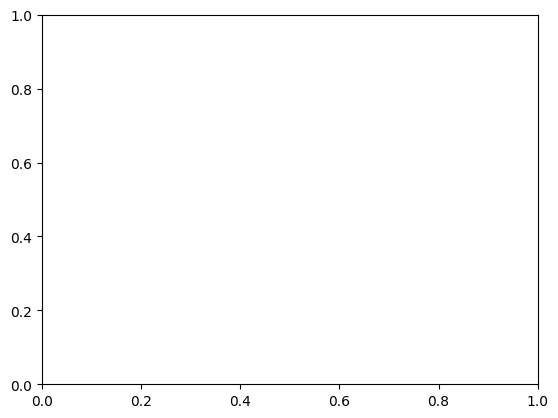

In [9]:
import serial_analysis as sa
from matplotlib import pyplot as plt
import numpy as np

def bit_histo(ax, node_size: int, zero_or_one: str, log_scale=False):
    dump_file =  choose_dump_file(zero_or_one, node_size)
    print(f"{dump_file=}")

    bit_indices, delays = sa.file_find_bit_flips(dump_file, verbose=1)

    none_x = { 90: 6.0, 150: 30, 250: 900 }[node_size]
    lim_y = { 90: 140_000, 150: 35_000, 250: 15_000 }[node_size]


    if log_scale:
        lim_y = { 90: 1e6, 150: 1e5, 250: 1e5 }[node_size]
        ax.set_yscale('log')

    # print(f"{none_x=}, {lim_y=}")

    ax.set_ylim([None, lim_y])

    ax.hist(np.array(list(delays[i] if i is not None else none_x for i in bit_indices if i is not None)), bins=30)
    if node_size == 90:
        ax.set_xticks(np.arange(0, 6, 1))
        ax.hist(np.array(list(delays[i] if i is not None else none_x for i in bit_indices if i is None)), bins=30, label='Does not flip in range of delays')
        ax.legend()
    ax.set_title(f"All-{zero_or_one} bits at {node_size}nm")
    ax.set_xlabel("t_d (ms)")

    if log_scale:
        ax.set_ylabel("Bit flip count (log)")
    else:
        ax.set_ylabel("Bit flip count")

print("Plotting 90nm")
fig1, ax1 = plt.subplots()
bit_histo(ax1, 90, 'zero')
fig1, ax1 = plt.subplots()
bit_histo(ax1, 90, 'one')

print("Plotting 150nm")
fig1, ax1 = plt.subplots()
bit_histo(ax1, 150, 'zero')
fig1, ax1 = plt.subplots()
bit_histo(ax1, 150, 'one')

print("Plotting 250nm")
fig1, ax1 = plt.subplots()
bit_histo(ax1, 250, 'zero')
fig1, ax1 = plt.subplots()
bit_histo(ax1, 250, 'one')


nm=90, bit='zero'
nm=90, bit='one'
nm=150, bit='zero'
nm=150, bit='one'
nm=250, bit='zero'
nm=250, bit='one'


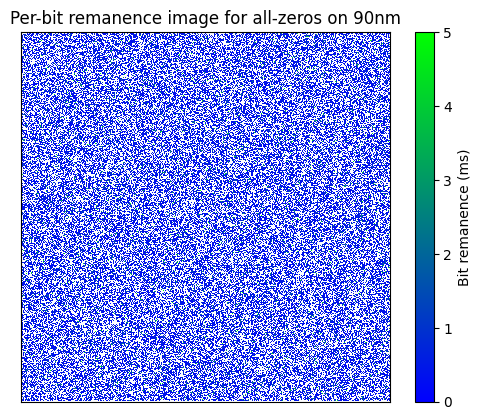

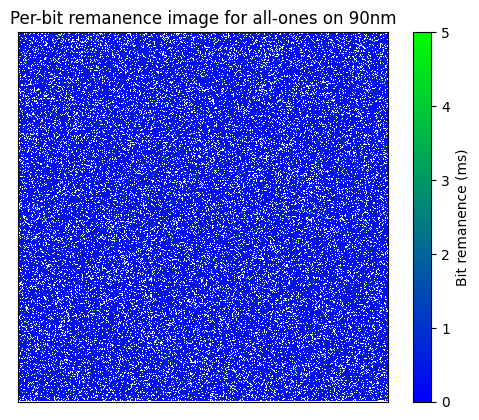

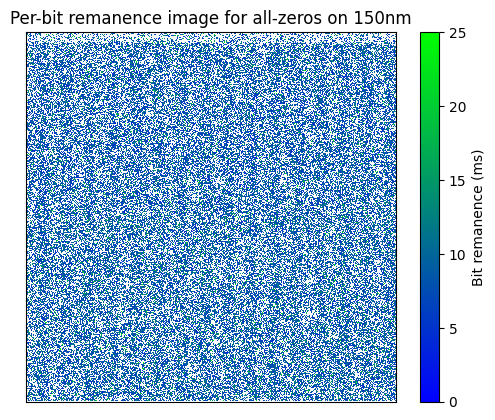

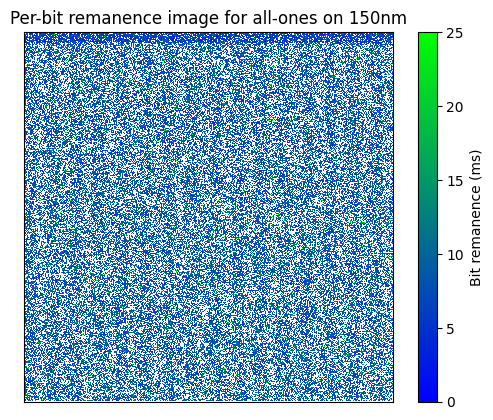

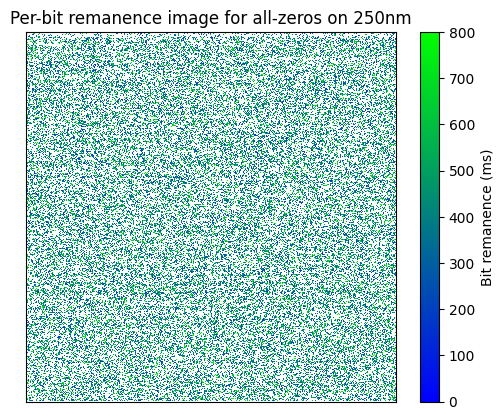

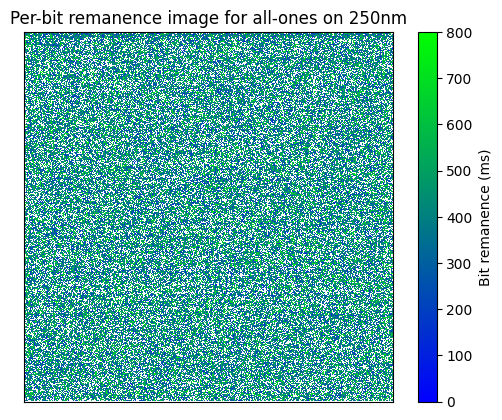

In [21]:
import serial_analysis as sa
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

img_width, img_height = 512, 512
img_bits = img_width * img_height


def delay_heatmap(node_size: int, zero_or_one: str):
    bit_indices, delays = sa.file_find_bit_flips(choose_dump_file(zero_or_one, node_size))

    fig, ax = plt.subplots()

    # replace None with 0 in the image (will be covered up later)
    cmap1 = LinearSegmentedColormap.from_list('', [ (0, 'blue'), (1, 'lime') ])
    delay_image = np.array(list( 0.0 if x is None else delays[x] for x in bit_indices )[:img_bits]).reshape((img_height, img_width))

    # no_flip_color = 'white' if zero_or_one == 'one' else 'black'
    no_flip_color = 'white'
    cmap2 = LinearSegmentedColormap.from_list('', [ (0, (0,0,0,0)), (1, no_flip_color) ])
    overlay_image = np.array(list( 1.0 if x is None else 0.0 for x in bit_indices )[:img_bits]).reshape((img_height, img_width))

    plt.imshow(delay_image, interpolation='none', cmap=cmap1)
    plt.imshow(overlay_image, interpolation='none', cmap=cmap2)
    
    # fig.set_figwidth(10)
    # fig.set_figheight(10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Per-bit remanence image for all-{zero_or_one}s on {node_size}nm")
    fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin=0, vmax=delays[-1]), cmap=cmap1), ax=ax, label="Bit remanence (ms)")


for nm in (90,150,250):
    for bit in ('zero','one'):
        print(f"{nm=}, {bit=}")
        delay_heatmap(nm, bit)
        # break
    # break

## Per-bit remanence on Mona Lisa image

nm=90
nm=150
nm=250


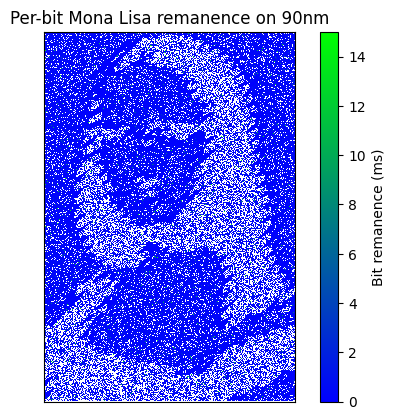

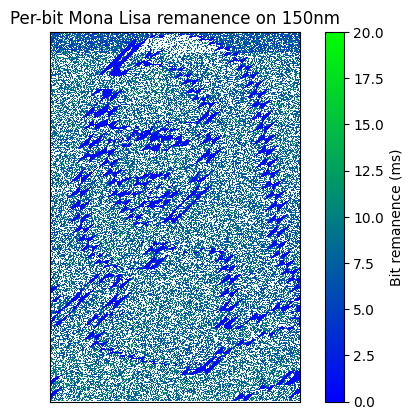

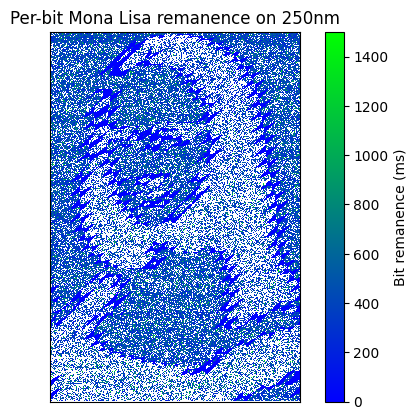

In [15]:
import serial_analysis as sa
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize


img_width = 305
img_height = 450
img_bits = img_width * img_height
img_words = img_bits // 16
monalisa_img_filename = r"Monalisa\test_monalisa_hex4.txt"

monalisa_90nm_dump  = r"..\serial-data\inh1-90nm-monalisa-remanence-1.txt"
monalisa_150nm_dump = r"..\serial-data\inh2-150nm-monalisa-remanence-1.txt"
monalisa_250nm_dump = r"..\serial-data\inh3-250nm-monalisa-remanence-1.txt"


def choose_monalisa_dump_file(node_size):
    return { 90: monalisa_90nm_dump, 
            150: monalisa_150nm_dump, 
            250: monalisa_250nm_dump }[node_size]


def monalisa_delay_heatmap(node_size):
    bit_indices, delays = sa.file_find_bit_flips(choose_monalisa_dump_file(node_size))
    # bit_indices, delays = sa.file_find_bit_flips(choose_monalisa_dump_file(node_size), word_flip=False)

    fig, ax = plt.subplots()

    # replace None with 0 in the image (will be covered up later)
    cmap1 = LinearSegmentedColormap.from_list('', [ (0, 'blue'), (1, 'lime') ])
    delay_image = np.array(list( 0.0 if x is None else delays[x] for x in bit_indices )[:img_bits]).reshape((img_height, img_width))

    # no_flip_color = 'white' if zero_or_one == 'one' else 'black'
    no_flip_color = 'white'
    cmap2 = LinearSegmentedColormap.from_list('', [ (0, (0,0,0,0)), (1, no_flip_color) ])
    overlay_image = np.array(list( 1.0 if x is None else 0.0 for x in bit_indices )[:img_bits]).reshape((img_height, img_width))

    plt.imshow(delay_image, interpolation='none', cmap=cmap1)
    plt.imshow(overlay_image, interpolation='none', cmap=cmap2)
    
    # fig.set_figwidth(15)
    # fig.set_figheight(20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Per-bit Mona Lisa remanence on {node_size}nm")
    fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin=0, vmax=delays[-1]), cmap=cmap1), ax=ax, label="Bit remanence (ms)")


for nm in (90,150,250):
    print(f"{nm=}")
    monalisa_delay_heatmap(nm)
    # break

## investigate the jump in similarity graphs for 90nm

In [91]:
# load serial data dumps

# Mona Lisa image info
img_width, img_height = 305, 450
img_words = round(img_width * img_height / 16)

img_filename = r"Monalisa\test_monalisa_hex4.txt"
puf_90nm_filename = r"..\chips\inh1\puf\gold-PUF.txt"

# baseline differences between a chip's PUF and the Mona Lisa image
# (used for data normalization later)
baseline_90nm = sa.percent(sa.bit_diff_files(puf_90nm_filename, img_filename, num_words=img_words), img_words*16)

def temp_get_dump(i: int) -> np.ndarray:
    return np.array(sa.diff_puf_and_trials_dump(puf_90nm_filename, f"..\\serial-data\\inh1-90nm-monalisa-remanence-again-{i}.txt", num_words=img_words))
data_90nm_list = [ temp_get_dump(i) for i in range(1, 5+1) ]

Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and 'Monalisa\test_monalisa_hex4.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 40,478 (0.965%)
* Hamming weight for "Monalisa\test_monalisa_hex4.txt": 72,593 (1.731%)
* Number of bits different between the two files: 70,239 which is 51.177% of the given total size
Diffing file "..\chips\inh1\puf\gold-PUF.txt" against trials file "..\serial-data\inh1-90nm-monalisa-remanence-again-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
Diffing file "..\chips\inh1\puf\gold-PUF.txt" against trials file "..\serial-data\inh1-90nm-monalisa-remanence-again-2.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
Diffing file "..\chips\inh1\puf\gold-PUF.txt" against trials f

baseline_90nm=51.17670202844486


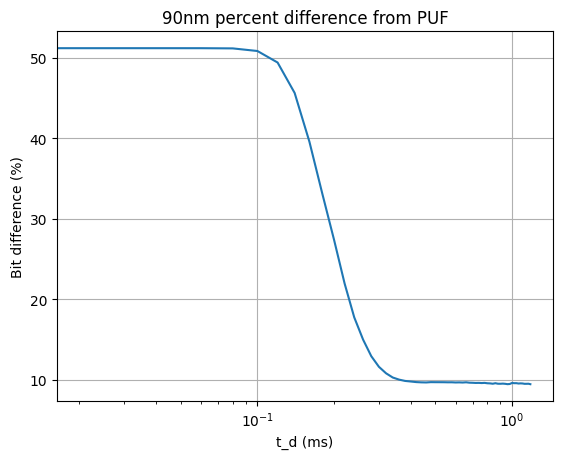

In [93]:
import matplotlib.pyplot as plt

data_90nm_avg = np.mean(np.stack(tuple(arr[:,1] for arr in data_90nm_list), axis=-1), axis=1)

print(f"{baseline_90nm=}")

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(data_90nm_list[0][:,0], data_90nm_avg)
# ax.plot(data_90nm_list[0][:,0], data_90nm_list[0][:,1])
# ax.plot(data_90nm_list[0][:,0], data_90nm_list[1][:,1])
ax.set_title('90nm percent difference from PUF')
ax.set_xlabel('t_d (ms)')
ax.set_ylabel('Bit difference (%)')
# ax.grid()

## Accounting for natural 1s and 0s in the bit flip plots

In [6]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import numpy as np

img_width = img_height = 512
img_bits = img_width * img_height
img_words = img_bits // 16

ones_img_filename = f"all-ones-{img_width}x{img_height}.txt"
zeros_img_filename = f"all-zeros-{img_width}x{img_height}.txt"

puf_90nm_filename = r"..\chips\inh1\puf\gold-PUF.txt"
puf_150nm_filename = r"..\chips\inh2\puf\gold-PUF.txt"
puf_250nm_filename = r"..\chips\inh3\puf\gold-PUF.txt"

ones_90nm_dump  = r"..\serial-data\inh1-90nm-ones-remanence-1.txt"
ones_150nm_dump = r"..\serial-data\inh2-150nm-ones-remanence-1.txt"
ones_250nm_dump = r"..\serial-data\inh3-250nm-ones-remanence-1.txt"

zeros_90nm_dump  = r"..\serial-data\inh1-90nm-zeros-remanence-1.txt"
zeros_150nm_dump = r"..\serial-data\inh2-150nm-zeros-remanence-1.txt"
zeros_250nm_dump = r"..\serial-data\inh3-250nm-zeros-remanence-1.txt"

In [7]:
CHIP_FOLDER_NAMES = { 90: 'inh1', 150: 'inh2', 250: 'inh3' }


def choose_dump_file(zero_or_one, node_size):
    # print(f"{zero_or_one=}, {node_size=}")
    return {
        'one': { 90: ones_90nm_dump, 150: ones_150nm_dump, 250: ones_250nm_dump, },
        'zero': { 90: zeros_90nm_dump, 150: zeros_150nm_dump, 250: zeros_250nm_dump, },
    }[zero_or_one][node_size]


def create_puf_like_file(node_size: int, mode: str):
    '''This function is needed to run once to create the data files from the PUF captures for each chip'''
    assert(node_size)
    assert(len(mode) > 0)
    fname = choose_puf_like_file(node_size, mode)
    node_folder = CHIP_FOLDER_NAMES[node_size]
    puf_captures_11 = f"../chips/{node_folder}/puf/captures-combined.txt"
    print(f"Creating file {fname} from {puf_captures_11}...")
    sa.create_gold_puf_classification(num_captures=11, input_file_name=puf_captures_11, output_file_name=fname, mode=mode)


def choose_puf_like_file(node_size: int, mode: str):
    '''Get the filename for a chip for its PUF, natural 0s, natural 1s, or wavering bits.'''
    chip_name = CHIP_FOLDER_NAMES[node_size]
    return f"../chips/{chip_name}/puf/{mode}"

In [ ]:
# for size in (90, 150, 250):
#     for mode in ('wavering.txt', 'natural-0s.txt', 'natural-1s.txt'):
#         create_puf_like_file(size, mode)

FileNotFoundError: [Errno 2] No such file or directory: '../chips/inh1/puf/wavering.txt'

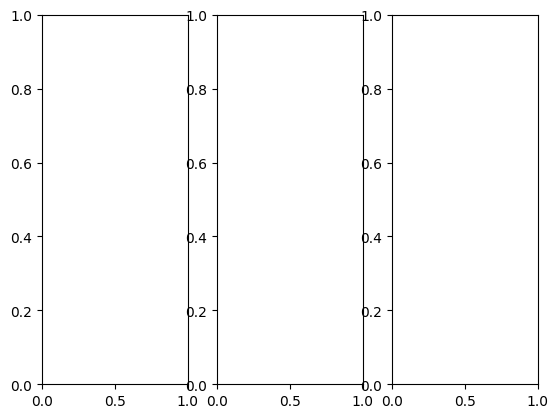

In [8]:
# NOTE: max hamming weight is 512x512 because this is just for the image bits (subset of the whole memory)

img_bits = 512*512

for size in (90, 150, 250):
    fig, axs = plt.subplots(1, 3)

    for i, mode in enumerate(('wavering.txt', 'natural-0s.txt', 'natural-1s.txt')):
        img = sa.file_read_image(choose_puf_like_file(size, mode), img_width, img_height)

        hamming_weight = sa.percent(sum(np.nditer(img)), img_bits) # each array element is either 1 or 0

        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(f"{size}nm {mode[:-4].replace('natural', 'strong')} bits") # str slicing and .replace used because 'mode' is a filename
        axs[i].imshow(img, cmap='gray')
        axs[i].set_xlabel(f'HW = {hamming_weight:.2f}% of image')

    fig.set_figwidth(8)
    fig.set_figheight(5)

    print("Saving figure to file...")
    fig.savefig(f"temp-fig-{size}.png")

In [15]:
# sanity check for hamming weights & bits

total = 0
for kind in ('wavering.txt', 'natural-0s.txt', 'natural-1s.txt'):
    weight = sa.file_hamming_weight(choose_puf_like_file(250, kind), sa.NUM_WORDS)
    print(f"{kind}: {weight}")
    print(f"{sa.percent(weight, sa.NUM_BITS)=:.2f}%")
    total += weight
print(f"Total bits = {total} out of {sa.NUM_BITS=} (equal = {total==sa.NUM_BITS})")

wavering.txt: 370458
sa.percent(weight, sa.NUM_BITS)=8.83%
natural-0s.txt: 1908531
sa.percent(weight, sa.NUM_BITS)=45.50%
natural-1s.txt: 1915315
sa.percent(weight, sa.NUM_BITS)=45.66%
Total bits = 4194304 out of sa.NUM_BITS=4194304 (equal = True)


Plotting 90nm
expected 16384 words but found 16400 instead
Plotting 150nm
expected 16384 words but found 16400 instead
Plotting 250nm
expected 16384 words but found 16400 instead


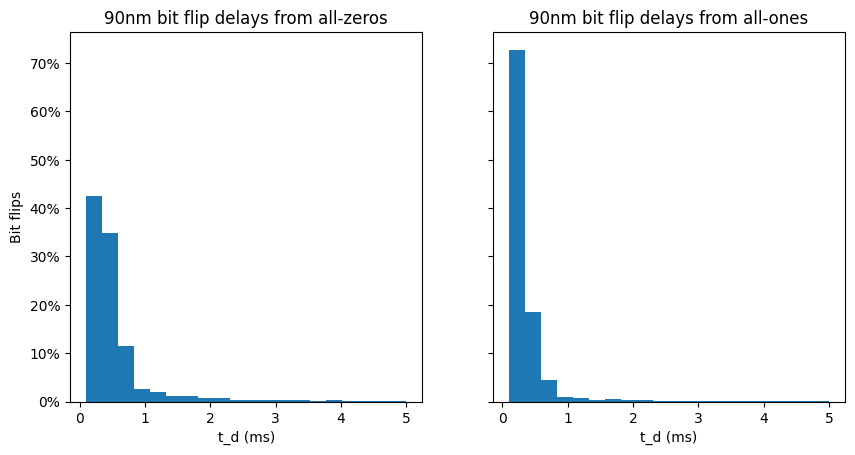

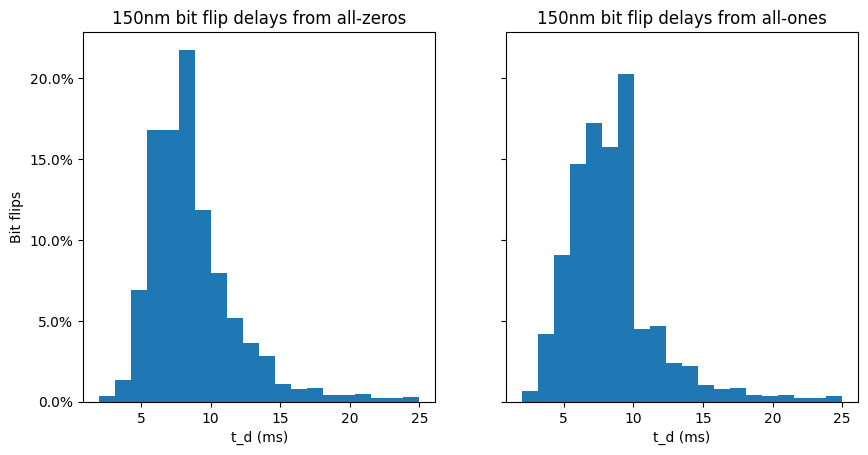

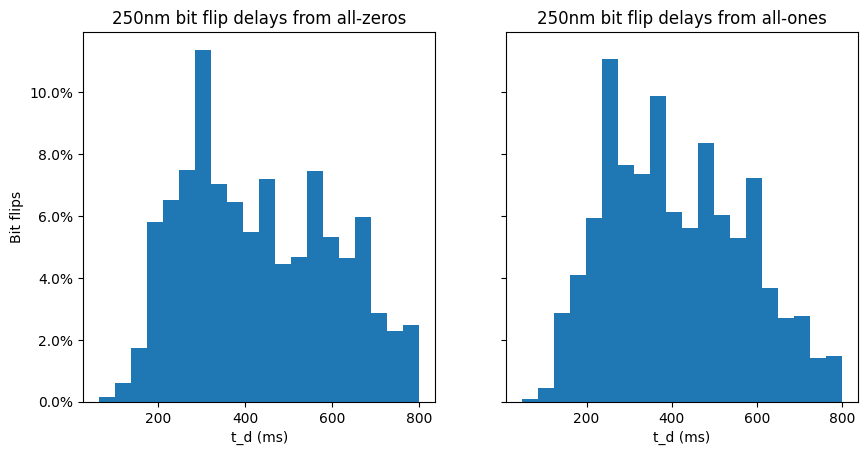

In [16]:
import serial_analysis as sa
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

def bit_histo_fixed2(ax, node_size: int, zero_or_one: str):
    '''Bit flip time historgram, corrected to ignore strong 0s and strong 1s'''

    num_words = (512*512)//16
    # print(f"{512*512=}")
    # print(f"{num_words=}, {num_words*16=}")

    dump_file =  choose_dump_file(zero_or_one, node_size)
    # print(f"{dump_file=}")

    bit_indices, delays = sa.file_find_bit_flips(dump_file, expected_word_count=num_words)
    # print(f"{len(bit_indices)=}")
    assert(len(bit_indices) == num_words*16)

    # Ignore strong 0s if image is all 0s and ignore strong 1s if image is all 1s
    mode = "natural-0s.txt" if (zero_or_one == "zero") else "natural-1s.txt"
    strong_bits_filename = choose_puf_like_file(node_size, mode)
    ignore_array = sa.file_read_hex4_dump_as_words(strong_bits_filename, num_words)
    assert(ignore_array.shape[0] == num_words)

    def bit_ignored(bit_i: int) -> bool:
        word = ignore_array[bit_i // 16]
        i = bit_i % 16
        return 1 == ((word >> i) & 1)

    filtered_bit_indices = filter(lambda pair: (not bit_ignored(pair[0])) and (pair[1] is not None), enumerate(bit_indices))
    bit_delays = tuple( delays[pair[1]] for pair in filtered_bit_indices )

    ax.hist(bit_delays, 20, weights=np.ones(len(bit_delays))/len(bit_delays)*100)
    
    bit = 1 if zero_or_one == 'one' else 0
    ax.set_title(f"{node_size}nm bit flip delays from all-{zero_or_one}s")
    ax.set_xlabel("t_d (ms)")

    return ax

for size in (90, 150, 250):
    print(f"Plotting {size}nm")
    fig1, axs = plt.subplots(1, 2, sharey=True)
    bit_histo_fixed2(axs[0], size, 'zero').set_ylabel("Bit flips")
    bit_histo_fixed2(axs[1], size, 'one')
    fig1.set_figwidth(10)
    fig1.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(100))
    fig1.savefig(f'temp-fig-{size}.png')


## Tech-dependent remanence time for Farzana

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import serial_analysis as sa

# Mona Lisa image info
img_width, img_height = 305, 450
img_words = round(img_width * img_height / 16)
img_filename = r"Monalisa\test_monalisa_hex4.txt"

print()

# PUF files for the different tech. node sizes
puf_90nm_filename = r"..\chips\inh1\puf\gold-PUF.txt"
puf_150nm_filename = r"..\chips\inh2\puf\gold-PUF.txt"
puf_250nm_filename = r"..\chips\inh3\puf\gold-PUF.txt"

# compute file differences from monalisa image and PUF for each remanence experiment file...

F = sa.files_data_loss_percent#(data_original_file, pu_read_trials_file, pu_ref_file, num_words: int=NUM_WORDS)

data_90nm_1 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-1.txt", puf_90nm_filename, num_words=img_words)
data_90nm_2 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-2.txt", puf_90nm_filename, num_words=img_words)
data_90nm_3 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-3.txt", puf_90nm_filename, num_words=img_words)
data_90nm_4 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-again-1.txt", puf_90nm_filename, num_words=img_words)
data_90nm_5 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-again-2.txt", puf_90nm_filename, num_words=img_words)
data_90nm_6 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-again-3.txt", puf_90nm_filename, num_words=img_words)
data_90nm_7 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-again-4.txt", puf_90nm_filename, num_words=img_words)
data_90nm_8 = F(img_filename, r"..\serial-data\inh1-90nm-monalisa-remanence-again-5.txt", puf_90nm_filename, num_words=img_words)

data_150nm_1 = F(img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-1.txt", puf_150nm_filename, num_words=img_words)
data_150nm_2 = F(img_filename, r"..\serial-data\inh2-150nm-monalisa-remanence-2.txt", puf_150nm_filename, num_words=img_words)

data_250nm_1 = F(img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-1.txt", puf_250nm_filename, num_words=img_words)
data_250nm_2 = F(img_filename, r"..\serial-data\inh3-250nm-monalisa-remanence-2.txt", puf_250nm_filename, num_words=img_words)

# combine file data into arrays, one for each type
data_90nm = np.array(sorted(data_90nm_1 + data_90nm_2 + data_90nm_3))
data_150nm = np.array(sorted(data_150nm_1 + data_150nm_2))
data_250nm = np.array(sorted(data_250nm_1 + data_250nm_2))

Why does data loss go above 100% (it should not)?

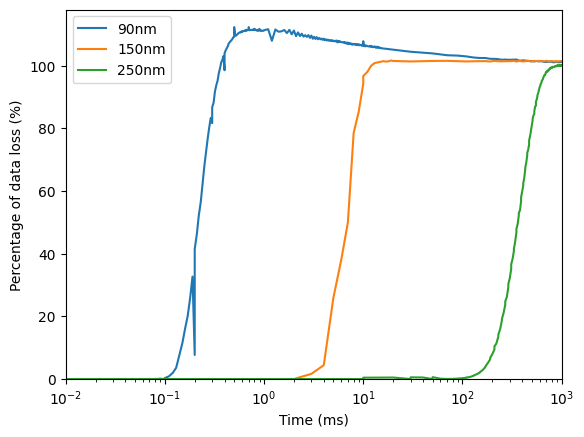

In [4]:
fig, ax = plt.subplots()

# data_90nm_list = [data_90nm_1, data_90nm_2, data_90nm_3, data_90nm_4, data_90nm_5, data_90nm_6, data_90nm_7, data_90nm_8]
# for i, data_x in enumerate(data_90nm_list):
#     data_x = np.array(data_x)
#     ax.plot(data_x[:,0], data_x[:,1], '.', label=str(i))

ax.plot(data_90nm[:,0], data_90nm[:,1], label='90nm')
ax.plot(data_150nm[:,0], data_150nm[:,1], label='150nm')
ax.plot(data_250nm[:,0], data_250nm[:,1], label='250nm')

ax.set_ylim([0, None])
ax.set_xlim([0.01, 1000])
# ax.set_xlim([0, 800])
ax.set_ylabel('Percentage of data loss (%)')
ax.set_xlabel('Time (ms)')
ax.set_xscale('log')
ax.legend()
# ax.grid()

## Getting remanence time with more trials

num_trials=5, IMG_128_NUM_WORDS=1024, num_skip_words=10
Loading trials for all-0s on 90nm chip...
../chips/inh1/puf/gold-PUF.txt
Loading trials for all-1s on 90nm chip...
../chips/inh1/puf/gold-PUF.txt
Loading trials for all-0s on 150nm chip...
../chips/inh2/puf/gold-PUF.txt
Loading trials for all-1s on 150nm chip...
../chips/inh2/puf/gold-PUF.txt
Loading trials for all-0s on 250nm chip...
../chips/inh3/puf/gold-PUF.txt
Loading trials for all-1s on 250nm chip...
../chips/inh3/puf/gold-PUF.txt


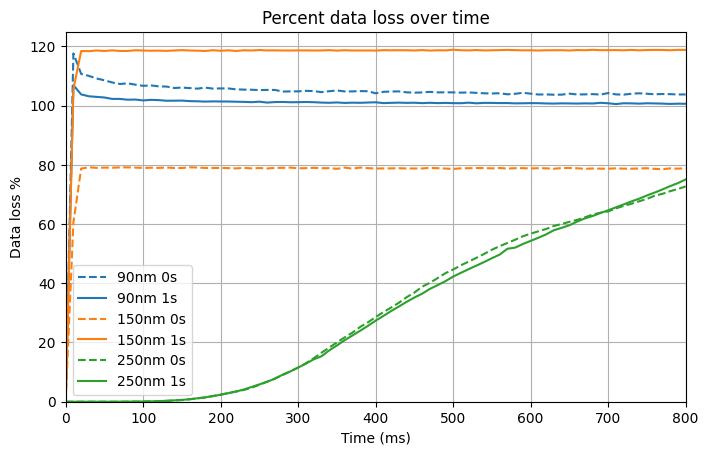

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import serial_analysis as sa

CHIP_NAMES = { 90: 'inh1', 150: 'inh2', 250: 'inh3' }
IMG_128_NUM_WORDS = (128 * 128) // 16

num_trials = 5
num_skip_words = 10
print(f"{num_trials=}, {IMG_128_NUM_WORDS=}, {num_skip_words=}")

fig, ax = plt.subplots()

for i, node_size in enumerate((90, 150, 250)):
    # puf_file_name = f"../chips/{CHIP_NAMES[node_size]}/puf-old/gold-PUF.txt"
    puf_file_name = f"../chips/{CHIP_NAMES[node_size]}/puf/gold-PUF.txt"
    # print(puf_file_name)
    ## Run for all-1s data and all-0s data
    for bit in (0, 1):
        print(f"Loading trials for all-{bit}s on {node_size}nm chip...")
        original_data_file = 'all-ones-128x128.txt' if (bit == 1) else 'all-zeros-128x128.txt'

        print(f"{puf_file_name}")

        # Get data losses from multiple trial runs
        data_losses = []
        try:
            for trial_num in range(1, num_trials + 1):
                capture_file_name = f"../serial-data/consistent-july/{node_size}nm-{bit}s-upto-800ms-{trial_num}.txt"
                data_loss_list = sa.files_data_loss_percent(original_data_file, capture_file_name, puf_file_name, IMG_128_NUM_WORDS, num_skip_words)
                data_losses.append(data_loss_list)
                # print(data_loss_list)
        except FileNotFoundError:
            print(f"(!) Skipping missing data file for {node_size}nm all {bit}s (trial #{trial_num})")
            continue

        assert(len(data_losses) == num_trials)

        # Sum up the data losses
        sum_data_losses = dict()
        for trials_losses in data_losses:
            for time, loss in trials_losses:
                sum_data_losses[time] = sum_data_losses.get(time, 0.0) + loss

        # print(sum_data_losses)

        # Turn trials loss sum into average
        avg_data_losses = { time: (val / num_trials) for (time, val) in sum_data_losses.items() }
        data = np.array(tuple(sorted(avg_data_losses.items())))
        ax.plot(data[:,0], data[:,1], '-' if bit else '--', label=f"{node_size}nm {bit}s", color=f"C{i}")

# ax.set_title(f"Data loss over time ({num_trials} trial average)")
ax.set_title(f"Percent data loss over time")
fig.set_figwidth(8)
# fig.set_figheight(12)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Data loss %")
ax.set_xlim([0, 800])
ax.set_ylim([0, None])
ax.legend()
# ax.grid()

num_trials=5, IMG_128_NUM_WORDS=1024
Loading trials for all-0s on 90nm chip...
../chips/inh1/puf/gold-PUF.txt
Diffing file "../chips/inh1/puf/gold-PUF.txt" against trials file "../serial-data/consistent-july/90nm-0s-upto-800ms-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 
Diffing file "../chips/inh1/puf/gold-PUF.txt" against trials file "../serial-data/consistent-july/90nm-0s-upto-800ms-2.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 
Diffing file "../chips/inh1/puf/gold-PUF.txt" against trials file "../serial-data/consistent-july/90nm-0s-upto-800ms-3.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

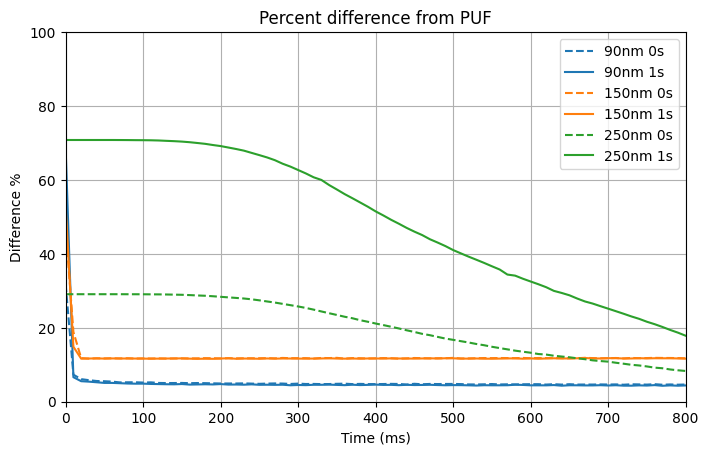

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import serial_analysis as sa

CHIP_NAMES = { 90: 'inh1', 150: 'inh2', 250: 'inh3' }
IMG_128_NUM_WORDS = (128 * 128) // 16

num_trials = 5
print(f"{num_trials=}, {IMG_128_NUM_WORDS=}")

fig, ax = plt.subplots()

for i, node_size in enumerate((90, 150, 250)):
    # puf_file_name = f"../chips/{CHIP_NAMES[node_size]}/puf-old/gold-PUF.txt"
    puf_file_name = f"../chips/{CHIP_NAMES[node_size]}/puf/gold-PUF.txt"
    # print(puf_file_name)
    ## Run for all-1s data and all-0s data
    for bit in (0, 1):
        print(f"Loading trials for all-{bit}s on {node_size}nm chip...")
        original_data_file = 'all-ones-128x128.txt' if (bit == 1) else 'all-zeros-128x128.txt'

        print(f"{puf_file_name}")

        # Get data losses from multiple trial runs
        data_losses = []
        try:
            for trial_num in range(1, num_trials + 1):
                capture_file_name = f"../serial-data/consistent-july/{node_size}nm-{bit}s-upto-800ms-{trial_num}.txt"
                data_loss_list = sa.diff_puf_and_trials_dump(puf_file_name, capture_file_name, IMG_128_NUM_WORDS)
                data_losses.append(data_loss_list)
                # print(data_loss_list)
        except FileNotFoundError:
            print(f"(!) Skipping missing data file for {node_size}nm all {bit}s (trial #{trial_num})")
            continue

        assert(len(data_losses) == num_trials)

        # Sum up the data losses
        sum_data_losses = dict()
        for trials_losses in data_losses:
            for time, loss in trials_losses:
                sum_data_losses[time] = sum_data_losses.get(time, 0.0) + loss

        # print(sum_data_losses)

        # Turn trials loss sum into average
        avg_data_losses = { time: (val / num_trials) for (time, val) in sum_data_losses.items() }
        data = np.array(tuple(sorted(avg_data_losses.items())))
        ax.plot(data[:,0], data[:,1], '-' if bit else '--', label=f"{node_size}nm {bit}s", color=f"C{i}")

# ax.set_title(f"Data loss over time ({num_trials} trial average)")
ax.set_title(f"Percent difference from PUF")
fig.set_figwidth(8)
# fig.set_figheight(12)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Difference %")
ax.set_xlim([0, 800])
ax.set_ylim([0, 100])
ax.legend()
# ax.grid()

num_trials=5, IMG_128_NUM_WORDS=1024
Loading trials for all-0s on 90nm chip...
../chips/inh1/puf/gold-PUF.txt
Diffing file "all-zeros-128x128.txt" against trials file "../serial-data/consistent-july/90nm-0s-upto-800ms-1.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 
Diffing file "all-zeros-128x128.txt" against trials file "../serial-data/consistent-july/90nm-0s-upto-800ms-2.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 
Diffing file "all-zeros-128x128.txt" against trials file "../serial-data/consistent-july/90nm-0s-upto-800ms-3.txt"
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 

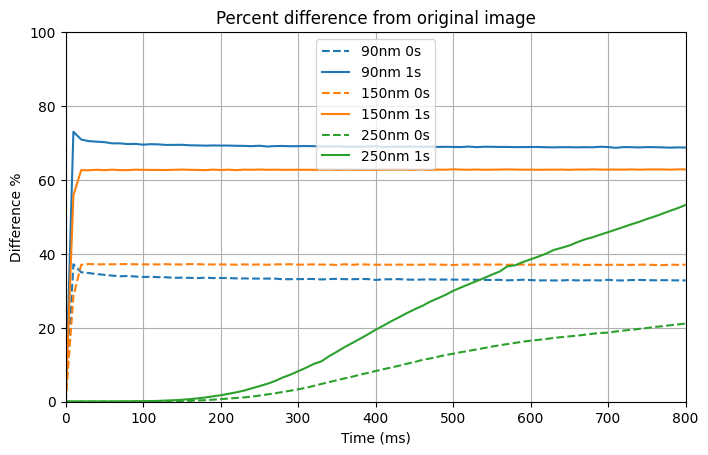

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import serial_analysis as sa

CHIP_NAMES = { 90: 'inh1', 150: 'inh2', 250: 'inh3' }
IMG_128_NUM_WORDS = (128 * 128) // 16

num_trials = 5
print(f"{num_trials=}, {IMG_128_NUM_WORDS=}")

fig, ax = plt.subplots()

for i, node_size in enumerate((90, 150, 250)):
    # puf_file_name = f"../chips/{CHIP_NAMES[node_size]}/puf-old/gold-PUF.txt"
    puf_file_name = f"../chips/{CHIP_NAMES[node_size]}/puf/gold-PUF.txt"
    # print(puf_file_name)
    ## Run for all-1s data and all-0s data
    for bit in (0, 1):
        print(f"Loading trials for all-{bit}s on {node_size}nm chip...")
        original_data_file = 'all-ones-128x128.txt' if (bit == 1) else 'all-zeros-128x128.txt'

        print(f"{puf_file_name}")

        # Get data losses from multiple trial runs
        data_losses = []
        try:
            for trial_num in range(1, num_trials + 1):
                capture_file_name = f"../serial-data/consistent-july/{node_size}nm-{bit}s-upto-800ms-{trial_num}.txt"
                data_loss_list = sa.diff_puf_and_trials_dump(original_data_file, capture_file_name, IMG_128_NUM_WORDS)
                data_losses.append(data_loss_list)
                # print(data_loss_list)
        except FileNotFoundError:
            print(f"(!) Skipping missing data file for {node_size}nm all {bit}s (trial #{trial_num})")
            continue

        assert(len(data_losses) == num_trials)

        # Sum up the data losses
        sum_data_losses = dict()
        for trials_losses in data_losses:
            for time, loss in trials_losses:
                sum_data_losses[time] = sum_data_losses.get(time, 0.0) + loss

        # print(sum_data_losses)

        # Turn trials loss sum into average
        avg_data_losses = { time: (val / num_trials) for (time, val) in sum_data_losses.items() }
        data = np.array(tuple(sorted(avg_data_losses.items())))
        ax.plot(data[:,0], data[:,1], '-' if bit else '--', label=f"{node_size}nm {bit}s", color=f"C{i}")

# ax.set_title(f"Data loss over time ({num_trials} trial average)")
ax.set_title(f"Percent difference from original image")
fig.set_figwidth(8)
# fig.set_figheight(12)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Difference %")
ax.set_xlim([0, 800])
ax.set_ylim([0, 100])
ax.legend()
# ax.grid()

In [6]:
import serial_analysis as sa

num_words = 1024
num_bits = num_words * 16

puf_file = r"..\chips\inh1\puf\gold-PUF.txt"
node_size = 90
bit = 1
trial_num = 1
cap_file = f"../serial-data/consistent-july/{node_size}nm-{bit}s-upto-800ms-{trial_num}.txt"
original_file = f"all-{"one" if bit else "zero"}s-128x128.txt"

In [9]:
print(f"{num_words=}, {num_bits=}")

print("--- Original image vs PU_read:")
with open(cap_file, 'rb') as cap_file_in:
    for i in range( 1 ):
        sa.file_seek_next_data_dump(cap_file_in)
    with open(original_file, 'rb') as original_file_in:
        cap_w, img_w, diff_w = sa.bit_diff_within_files(cap_file_in, original_file_in, num_words)
        print(f"{cap_w=}, {img_w=}, {diff_w=}")

print("--- Original image vs PU_ref:")
print(sa.bit_diff_files(original_file, puf_file, num_words))

num_words=1024, num_bits=16384
--- Original image vs PU_read:
cap_w=16368, img_w=16384, diff_w=16
--- Original image vs PU_ref:
Comparing bits from data files 'all-ones-128x128.txt' and '..\chips\inh1\puf\gold-PUF.txt'...
* Hamming weight for "all-ones-128x128.txt": 16,384 (0.391%)
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 5,200 (0.124%)
* Number of bits different between the two files: 11,184 which is 68.262% of the given total size
11184


In [10]:
## CREATE a bunch of files from XORing other ones together...

# Create files that are: original XOR dump_i
for trial_num in range(1, 11):
    with open(cap_file, 'rb') as cap_file_in:
        for _ in range(trial_num): sa.file_seek_next_data_dump(cap_file_in)
        sa.file_xor(original_file, cap_file_in, f"original-XOR-dump-{trial_num}", num_words)

# Create files that are: PUF XOR dump_i
for trial_num in range(1, 11):
    with open(cap_file, 'rb') as cap_file_in:
        for _ in range(trial_num): sa.file_seek_next_data_dump(cap_file_in)
        sa.file_xor(puf_file, cap_file_in, f"puf-XOR-dump-{trial_num}", num_words)

# Create one file that is: original XOR PUF
sa.file_xor(original_file, puf_file, f"original-XOR-puf", num_words)

### Getting better PUF files for the chips...

In [ ]:
## Create new gold PUF files for 90nm, 150nm, and 250nm chips...

from serial_analysis import create_gold_puf_v2

create_gold_puf_v2(num_captures=19, input_file_name=r"..\chips\inh1\puf\startup-19-captures-100ms.txt", output_file_name=r"..\chips\inh1\puf\gold-PUF.txt")

create_gold_puf_v2(num_captures=19, input_file_name=r"..\chips\inh2\puf\startup-19-captures-500ms.txt", output_file_name=r"..\chips\inh2\puf\gold-PUF.txt")

create_gold_puf_v2(num_captures=19, input_file_name=r"..\chips\inh3\puf\startup-19-captures-1500ms.txt", output_file_name=r"..\chips\inh3\puf\gold-PUF.txt")

In [1]:
import serial_analysis as sa

for i in (1,2,3):
    fname = fr"..\chips\inh{i}\puf\gold-PUF.txt"
    w = sa.file_hamming_weight(fname, sa.NUM_WORDS)
    p = sa.percent(w, sa.NUM_BITS)
    print(f"\"{fname}\" Hamming weight: {p:0.2f}% ({w} bits)")

"..\chips\inh1\puf\gold-PUF.txt" Hamming weight: 30.99% (1299610 bits)
"..\chips\inh2\puf\gold-PUF.txt" Hamming weight: 49.99% (2096647 bits)
"..\chips\inh3\puf\gold-PUF.txt" Hamming weight: 50.06% (2099859 bits)


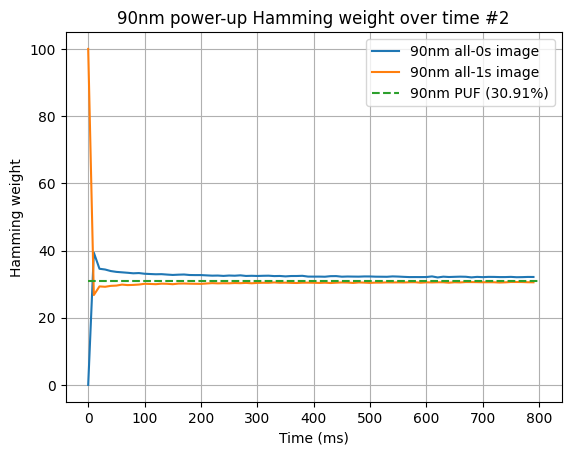

In [102]:
## Analyze hamming weight for trials in 90nm cases

import serial_analysis as sa
import matplotlib.pyplot as plt

num_img_bits = 256*256
num_img_words = num_img_bits//16

hamming_weight_puf_90nm = sa.percent(sa.file_hamming_weight('../chips/inh1/puf/gold-PUF.txt', num_img_words), num_img_bits)
# hamming_weight_puf_90nm_old = sa.file_hamming_weight('../chips/inh1/puf-old/gold-PUF.txt', num_img_words)

hw_90nm_0s_t = [] # time (x)
hw_90nm_0s_w = [] # weight (y)
with open("../serial-data/consistent-july-2/256x256-0s-90nm-upto-800ms-2.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_90nm_0s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_90nm_0s_w.append(sa.percent(sa.file_hamming_weight(trials_file, num_img_words), num_img_bits))

hw_90nm_1s_t = [] # time (x)
hw_90nm_1s_w = [] # weight (y)
with open("../serial-data/consistent-july-2/256x256-1s-90nm-upto-800ms-2.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_90nm_1s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_90nm_1s_w.append(sa.percent(sa.file_hamming_weight(trials_file, num_img_words), num_img_bits))

fig, ax = plt.subplots()
ax.set_title("90nm power-up Hamming weight over time #2")
# ax.set_xlim([0, 800])
# ax.set_ylim([0, num_img_words*16])
ax.plot(hw_90nm_0s_t, hw_90nm_0s_w, label='90nm all-0s image')
ax.plot(hw_90nm_1s_t, hw_90nm_1s_w, label='90nm all-1s image')
ax.plot([0, 800], [hamming_weight_puf_90nm, hamming_weight_puf_90nm], '--', label=f'90nm PUF ({hamming_weight_puf_90nm:0.2f}%)')
# ax.plot([0, 800], [hamming_weight_puf_90nm_old, hamming_weight_puf_90nm_old], '--', label='90nm PUF (old)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Hamming weight')
# ax.grid()
ax.legend()

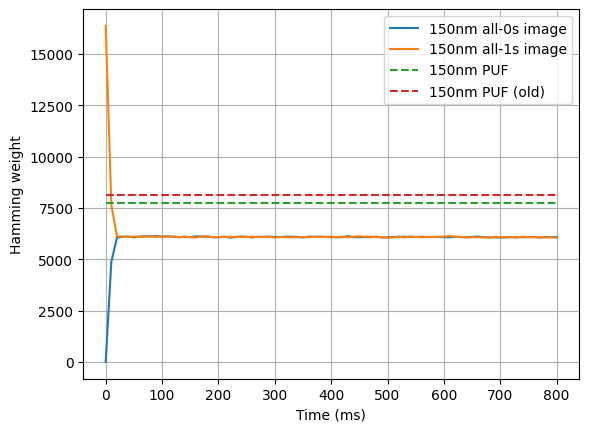

In [103]:
## Analyze hamming weight for trials in 150nm cases

import serial_analysis as sa

num_img_words = 1024

hamming_weight_puf_150nm = sa.file_hamming_weight('../chips/inh2/puf/gold-PUF.txt', num_img_words)
hamming_weight_puf_150nm_old = sa.file_hamming_weight('../chips/inh2/puf-old/gold-PUF.txt', num_img_words)

hw_150nm_0s_t = [] # time (x)
hw_150nm_0s_w = [] # weight (y)
with open("../serial-data/consistent-july/150nm-0s-upto-800ms-1.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_150nm_0s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_150nm_0s_w.append(sa.file_hamming_weight(trials_file, num_img_words))

hw_150nm_1s_t = [] # time (x)
hw_150nm_1s_w = [] # weight (y)
with open("../serial-data/consistent-july/150nm-1s-upto-800ms-1.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_150nm_1s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_150nm_1s_w.append(sa.file_hamming_weight(trials_file, num_img_words))

fig, ax = plt.subplots()
# ax.set_xlim([0, 800])
# ax.set_ylim([0, num_img_words*16])
ax.plot(hw_150nm_0s_t, hw_150nm_0s_w, label='150nm all-0s image')
ax.plot(hw_150nm_1s_t, hw_150nm_1s_w, label='150nm all-1s image')
ax.plot([0, 800], [hamming_weight_puf_150nm, hamming_weight_puf_150nm], '--', label='150nm PUF')
ax.plot([0, 800], [hamming_weight_puf_150nm_old, hamming_weight_puf_150nm_old], '--', label='150nm PUF (old)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Hamming weight')
# ax.grid()
ax.legend()

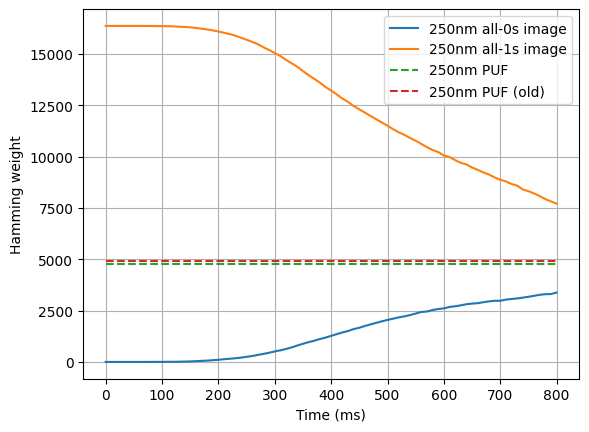

In [2]:
## Analyze hamming weight for trials in 250nm cases

import serial_analysis as sa
import matplotlib.pyplot as plt

num_img_words = 1024

hamming_weight_puf_250nm = sa.file_hamming_weight('../chips/inh3/puf/gold-PUF.txt', num_img_words)
hamming_weight_puf_250nm_old = sa.file_hamming_weight('../chips/inh3/puf-old/gold-PUF.txt', num_img_words)

hw_250nm_0s_t = [] # time (x)
hw_250nm_0s_w = [] # weight (y)
with open("../serial-data/consistent-july/250nm-0s-upto-800ms-1.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_250nm_0s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_250nm_0s_w.append(sa.file_hamming_weight(trials_file, num_img_words))

hw_250nm_1s_t = [] # time (x)
hw_250nm_1s_w = [] # weight (y)
with open("../serial-data/consistent-july/250nm-1s-upto-800ms-1.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_250nm_1s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_250nm_1s_w.append(sa.file_hamming_weight(trials_file, num_img_words))

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# ax.set_xlim([0, 800])
# ax.set_ylim([0, num_img_words*16])
ax.plot(hw_250nm_0s_t, hw_250nm_0s_w, label='250nm all-0s image')
ax.plot(hw_250nm_1s_t, hw_250nm_1s_w, label='250nm all-1s image')
ax.plot([0, 800], [hamming_weight_puf_250nm, hamming_weight_puf_250nm], '--', label='250nm PUF')
ax.plot([0, 800], [hamming_weight_puf_250nm_old, hamming_weight_puf_250nm_old], '--', label='250nm PUF (old)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Hamming weight')
# ax.grid()
ax.legend()

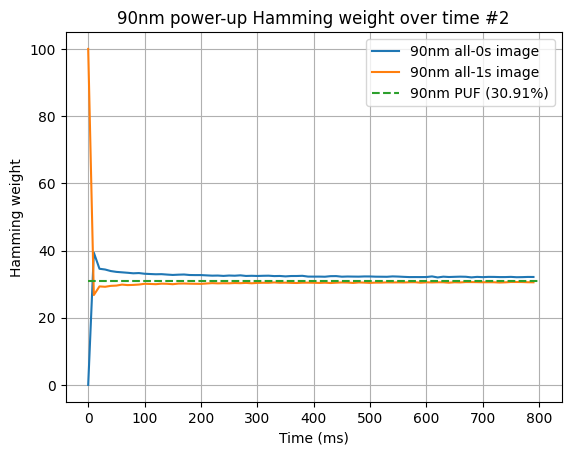

In [ ]:
## Analyze hamming weight for trials in 90nm cases

import serial_analysis as sa
import matplotlib.pyplot as plt

num_img_bits = 256*256
num_img_words = num_img_bits//16

hamming_weight_puf_90nm = sa.percent(sa.file_hamming_weight('../chips/inh1/puf/gold-PUF.txt', num_img_words), num_img_bits)
# hamming_weight_puf_90nm_old = sa.file_hamming_weight('../chips/inh1/puf-old/gold-PUF.txt', num_img_words)

hw_90nm_0s_t = [] # time (x)
hw_90nm_0s_w = [] # weight (y)
with open("../serial-data/consistent-july-2/256x256-0s-90nm-upto-800ms-2.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_90nm_0s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_90nm_0s_w.append(sa.percent(sa.file_hamming_weight(trials_file, num_img_words), num_img_bits))

hw_90nm_1s_t = [] # time (x)
hw_90nm_1s_w = [] # weight (y)
with open("../serial-data/consistent-july-2/256x256-1s-90nm-upto-800ms-2.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_90nm_1s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_90nm_1s_w.append(sa.percent(sa.file_hamming_weight(trials_file, num_img_words), num_img_bits))

fig, ax = plt.subplots()
ax.set_title("90nm power-up Hamming weight over time #2")
# ax.set_xlim([0, 800])
# ax.set_ylim([0, num_img_words*16])
ax.plot(hw_90nm_0s_t, hw_90nm_0s_w, label='90nm all-0s image')
ax.plot(hw_90nm_1s_t, hw_90nm_1s_w, label='90nm all-1s image')
ax.plot([0, 800], [hamming_weight_puf_90nm, hamming_weight_puf_90nm], '--', label=f'90nm PUF ({hamming_weight_puf_90nm:0.2f}%)')
# ax.plot([0, 800], [hamming_weight_puf_90nm_old, hamming_weight_puf_90nm_old], '--', label='90nm PUF (old)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Hamming weight')
# ax.grid()
ax.legend()

In [5]:
### Sanity checks
import serial_analysis as sa
## Check difference between HW for different tech nodes PUF...
print(sa.bit_diff_files('../chips/inh1/puf/gold-PUF.txt', '../chips/inh2/puf/gold-PUF.txt'))
print(sa.bit_diff_files('../chips/inh1/puf/gold-PUF.txt', '../chips/inh3/puf/gold-PUF.txt'))
print(sa.bit_diff_files('../chips/inh2/puf/gold-PUF.txt', '../chips/inh3/puf/gold-PUF.txt'))

Comparing bits from data files '../chips/inh1/puf/gold-PUF.txt' and '../chips/inh2/puf/gold-PUF.txt'...
* Hamming weight for "../chips/inh1/puf/gold-PUF.txt": 1,299,610 (30.985%)
* Hamming weight for "../chips/inh2/puf/gold-PUF.txt": 2,096,647 (49.988%)
* Number of bits different between the two files: 2,096,175 which is 49.977% of the given total size
2096175
Comparing bits from data files '../chips/inh1/puf/gold-PUF.txt' and '../chips/inh3/puf/gold-PUF.txt'...
* Hamming weight for "../chips/inh1/puf/gold-PUF.txt": 1,299,610 (30.985%)
* Hamming weight for "../chips/inh3/puf/gold-PUF.txt": 2,099,859 (50.065%)
* Number of bits different between the two files: 2,098,305 which is 50.027% of the given total size
2098305
Comparing bits from data files '../chips/inh2/puf/gold-PUF.txt' and '../chips/inh3/puf/gold-PUF.txt'...
* Hamming weight for "../chips/inh2/puf/gold-PUF.txt": 2,096,647 (49.988%)
* Hamming weight for "../chips/inh3/puf/gold-PUF.txt": 2,099,859 (50.065%)
* Number of bits dif

In [4]:
### Sanity checks
import serial_analysis as sa
## Check difference between old and new PUF for each _nm...
print(sa.bit_diff_files('../chips/inh1/puf/gold-PUF.txt', '../chips/inh1/puf-old/gold-PUF.txt'))
print(sa.bit_diff_files('../chips/inh2/puf/gold-PUF.txt', '../chips/inh2/puf-old/gold-PUF.txt'))
print(sa.bit_diff_files('../chips/inh3/puf/gold-PUF.txt', '../chips/inh3/puf-old/gold-PUF.txt'))

Comparing bits from data files '../chips/inh1/puf/gold-PUF.txt' and '../chips/inh1/puf-old/gold-PUF.txt'...
* Hamming weight for "../chips/inh1/puf/gold-PUF.txt": 1,299,610 (30.985%)
* Hamming weight for "../chips/inh1/puf-old/gold-PUF.txt": 1,231,002 (29.349%)
* Number of bits different between the two files: 335,108 which is 7.990% of the given total size
335108
Comparing bits from data files '../chips/inh2/puf/gold-PUF.txt' and '../chips/inh2/puf-old/gold-PUF.txt'...
* Hamming weight for "../chips/inh2/puf/gold-PUF.txt": 2,096,647 (49.988%)
* Hamming weight for "../chips/inh2/puf-old/gold-PUF.txt": 2,098,021 (50.021%)
* Number of bits different between the two files: 183,020 which is 4.364% of the given total size
183020
Comparing bits from data files '../chips/inh3/puf/gold-PUF.txt' and '../chips/inh3/puf-old/gold-PUF.txt'...
* Hamming weight for "../chips/inh3/puf/gold-PUF.txt": 2,099,859 (50.065%)
* Hamming weight for "../chips/inh3/puf-old/gold-PUF.txt": 2,100,609 (50.082%)
* Nu

## "Consistent-July-2" 256x256 images (all-1 and all-0)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import serial_analysis as sa

def show_binary_image_from_file(ax, file_name_in, img_width: int, img_height: int):
    with open(file_name_in, "rb") as file_in:
        bit_array = sa.file_read_image(file_in, img_width, img_height)
        show_binary_image_from_data(ax, bit_array)


def show_binary_image_from_data(ax, ndarray):
    '''A "binary image" is a black-and-white only 2D image (no grayscale) and this function displays one'''
    ax.set_xticks([])
    ax.set_yticks([])
    # These 'if' tests are only needed because otherwise an all-white image shows up as all-black for some reason
    # (thanks, matplotlib)
    if len(unique_arr := np.unique(ndarray)) == 1:
        if unique_arr[0] == 1:
            ax.imshow(ndarray, matplotlib.colors.ListedColormap(['white']))
        else:
            ax.imshow(ndarray, matplotlib.colors.ListedColormap(['black']))
    else:
        # ideally, this is the only branch we need (but it is not, see the above comment)
        ax.imshow(ndarray, matplotlib.colors.ListedColormap(['black', 'white']))

In [5]:
import math

def fig_image_remanence_row(original_image_filename: str, img_width: int, img_height: int, captures_filename: str, list_delays: list[float]):
    '''Show a matplotlib figure with a bunch of images from an Arduino Due SRAM remanence experiment memory dump file.'''
    img_bits = img_width * img_height
    img_words = math.ceil(img_bits / 16)

    fig, axs = plt.subplots(1, len(list_delays) + 1)

    # add a display of the original, pristine, image
    hw = sa.file_hamming_weight(original_image_filename, img_words)
    axs[0].set_title("Original")
    axs[0].set_xlabel(f"HW = {sa.percent(hw, img_bits):0.2f}%")
    show_binary_image_from_file(axs[0], original_image_filename, img_width, img_height)
    
    # now show an image for each of the delays given
    for i, delay_ms in enumerate(list_delays):
        ax_i = axs[1 + i]
        try:
            words = sa.file_load_trial_for_delay(captures_filename, delay_ms, max_count=img_words)
            img_i = sa.convert_words_to_image(words, img_width, img_height)
            hw = sum(map(sa.hamming_weight, np.reshape(img_i, [img_bits])))
            show_binary_image_from_data(ax_i, img_i)
        except KeyError as e:
            fig.clear()
            raise KeyError(f"The 'images_dict' does not have an entry for {delay_ms}")
        
        ax_i.set_title(f"{delay_ms} ms")
        ax_i.set_xlabel(f"HW = {sa.percent(hw, img_bits):0.2f}%")

    return fig, axs

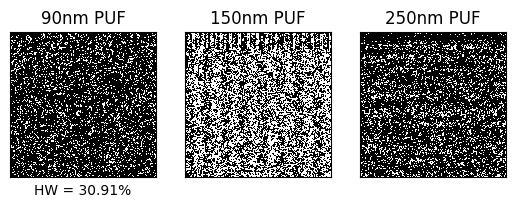

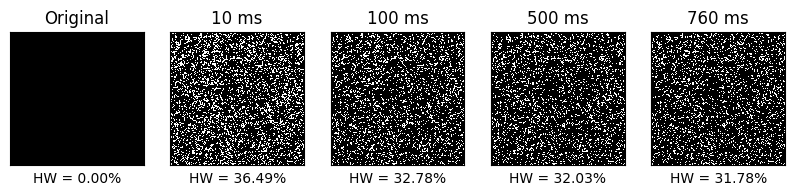

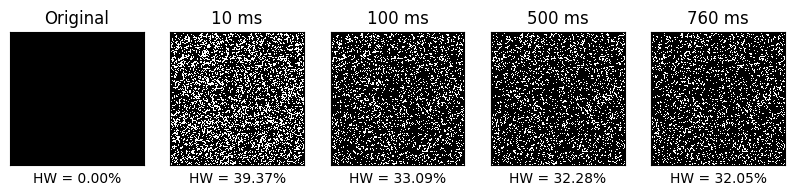

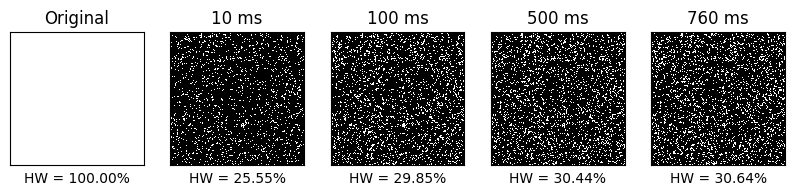

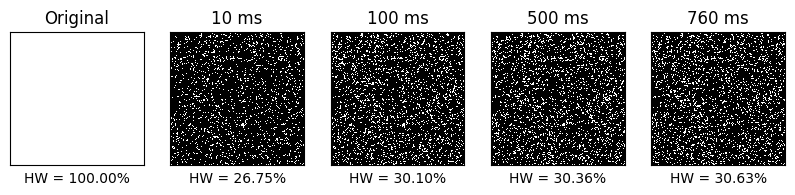

In [6]:
import serial_analysis as sa
import matplotlib.pyplot as plt

all_0s = "all-zeros-256x256.txt"
all_1s = "all-ones-256x256.txt"

img_dim = 256
img_bits = img_dim * img_dim
img_words = img_bits // 16

# Show PUF images...

fig, axs = plt.subplots(1, 3)
axs[0].set_title('90nm PUF')
hw = sa.percent(sa.file_hamming_weight("../chips/inh1/puf/gold-PUF.txt", img_words), img_bits)
axs[0].set_xlabel(f"HW = {hw:0.2f}%")
show_binary_image_from_file(axs[0], "../chips/inh1/puf/gold-PUF.txt", img_dim, img_dim)

axs[1].set_title('150nm PUF')
show_binary_image_from_file(axs[1], "../chips/inh2/puf/gold-PUF.txt", img_dim, img_dim)

axs[2].set_title('250nm PUF')
show_binary_image_from_file(axs[2], "../chips/inh3/puf/gold-PUF.txt", img_dim, img_dim)


# images_90nm_0s_1 = sa.remanence_experiment_get_images("../serial-data/consistent-july-2/256x256-0s-90nm-upto-800ms-1.txt", img_dim, img_dim)
# images_90nm_0s_2 = sa.remanence_experiment_get_images("../serial-data/consistent-july-2/256x256-0s-90nm-upto-800ms-2.txt", img_dim, img_dim)
# images_90nm_1s_1 = sa.remanence_experiment_get_images("../serial-data/consistent-july-2/256x256-1s-90nm-upto-800ms-1.txt", img_dim, img_dim)
# images_90nm_1s_2 = sa.remanence_experiment_get_images("../serial-data/consistent-july-2/256x256-1s-90nm-upto-800ms-2.txt", img_dim, img_dim)

times = [10, 100, 500, 760]
fig_image_remanence_row(all_0s, img_dim, img_dim, "../serial-data/consistent-july-2/256x256-0s-90nm-upto-800ms-1.txt", times)[0].set_figwidth(10)
fig_image_remanence_row(all_0s, img_dim, img_dim, "../serial-data/consistent-july-2/256x256-0s-90nm-upto-800ms-2.txt", times)[0].set_figwidth(10)
fig_image_remanence_row(all_1s, img_dim, img_dim, "../serial-data/consistent-july-2/256x256-1s-90nm-upto-800ms-1.txt", times)[0].set_figwidth(10)
fig_image_remanence_row(all_1s, img_dim, img_dim, "../serial-data/consistent-july-2/256x256-1s-90nm-upto-800ms-2.txt", times)[0].set_figwidth(10)

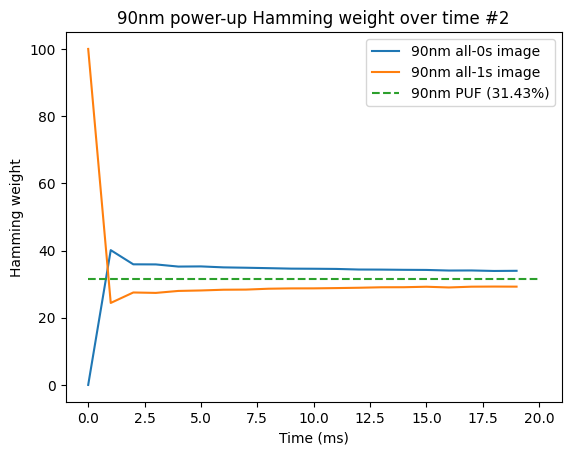

In [18]:
## Analyze hamming weight for trials in 90nm cases
## BUT with a different time range: 0ms-20ms

import serial_analysis as sa
import matplotlib.pyplot as plt

num_img_bits = 256*256
num_img_words = num_img_bits//16

hamming_weight_puf_90nm = sa.percent(sa.file_hamming_weight('../chips/inh1/puf/gold-PUF-2.txt', num_img_words), num_img_bits)
# hamming_weight_puf_90nm_old = sa.file_hamming_weight('../chips/inh1/puf-old/gold-PUF.txt', num_img_words)

hw_90nm_0s_t = [] # time (x)
hw_90nm_0s_w = [] # weight (y)
with open("../serial-data/consistent-july-2/256x256-0s-90nm-upto-20ms-2.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_90nm_0s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_90nm_0s_w.append(sa.percent(sa.file_hamming_weight(trials_file, num_img_words), num_img_bits))

hw_90nm_1s_t = [] # time (x)
hw_90nm_1s_w = [] # weight (y)
with open("../serial-data/consistent-july-2/256x256-1s-90nm-upto-20ms-2.txt", 'rb') as trials_file:
    while delay := sa.file_seek_next_delay_line(trials_file):
        hw_90nm_1s_t.append(float(delay))
        sa.file_seek_next_data_dump(trials_file)
        hw_90nm_1s_w.append(sa.percent(sa.file_hamming_weight(trials_file, num_img_words), num_img_bits))

fig, ax = plt.subplots()
ax.set_title("90nm power-up Hamming weight over time #2")
# ax.set_xlim([0, 800])
# ax.set_ylim([0, num_img_words*16])
ax.plot(hw_90nm_0s_t, hw_90nm_0s_w, label='90nm all-0s image')
ax.plot(hw_90nm_1s_t, hw_90nm_1s_w, label='90nm all-1s image')
ax.plot([0, 20], [hamming_weight_puf_90nm, hamming_weight_puf_90nm], '--', label=f'90nm PUF ({hamming_weight_puf_90nm:0.2f}%)')
# ax.plot([0, 800], [hamming_weight_puf_90nm_old, hamming_weight_puf_90nm_old], '--', label='90nm PUF (old)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Hamming weight')
# ax.grid()
ax.legend()

In [107]:
# 1000ms gold PUF for 90nm
sa.create_gold_puf_v2(num_captures=19, input_file_name=r"..\chips\inh1\puf\startup-19-captures-1000ms.txt", output_file_name=r"..\chips\inh1\puf\gold-PUF-2.txt")

- loading file "..\chips\inh1\puf\startup-19-captures-1000ms.txt"
Processing capture #1 in the file
Processing capture #2 in the file
Processing capture #3 in the file
Processing capture #4 in the file
Processing capture #5 in the file
Processing capture #6 in the file
Processing capture #7 in the file
Processing capture #8 in the file
Processing capture #9 in the file
Processing capture #10 in the file
Processing capture #11 in the file
Processing capture #12 in the file
Processing capture #13 in the file
Processing capture #14 in the file
Processing capture #15 in the file
Processing capture #16 in the file
Processing capture #17 in the file
Processing capture #18 in the file
Processing capture #19 in the file
saving result to output file...
done


In [111]:
print('1)', sa.file_hamming_weight(r"..\chips\inh1\puf\gold-PUF.txt", sa.NUM_WORDS))
print('2)', sa.file_hamming_weight(r"..\chips\inh1\puf\gold-PUF-2.txt", sa.NUM_WORDS))
print('3)', sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", r"..\chips\inh1\puf\gold-PUF-2.txt", sa.NUM_WORDS))

1) 1299610
2) 1312842
Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and '..\chips\inh1\puf\gold-PUF-2.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 1,299,610 (30.985%)
* Hamming weight for "..\chips\inh1\puf\gold-PUF-2.txt": 1,312,842 (31.301%)
* Number of bits different between the two files: 109,522 which is 2.611% of the given total size
3) 109522


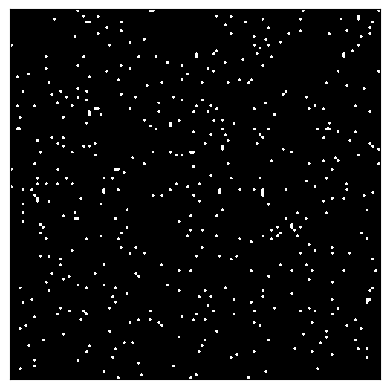

In [16]:
# visual Difference between 90nm PUFs
import serial_analysis as sa
import matplotlib.pyplot as plt
img_size = 128
img_file = 'temp-puf-XOR-puf.txt'
sa.file_xor_basic(r"..\chips\inh1\puf\gold-PUF.txt", r"..\chips\inh1\puf\gold-PUF-2.txt", img_file, img_size*img_size//16)
fig, ax = plt.subplots()
show_binary_image_from_file(ax, img_file, img_size, img_size)

In [20]:
print(sa.bit_diff_files(r"..\chips\inh1\puf\gold-PUF.txt", "../temp-capture.txt", 10_000))

Comparing bits from data files '..\chips\inh1\puf\gold-PUF.txt' and '../temp-capture.txt'...
* Hamming weight for "..\chips\inh1\puf\gold-PUF.txt": 49,740 (1.186%)
* Hamming weight for "../temp-capture.txt": 51,283 (1.223%)
* Number of bits different between the two files: 8,047 which is 5.029% of the given total size
8047


## More data checks

Run a bunch of quick 256x256 remanence experiments and plot them together to see any variations

256x256-0s-90nm-upto-800ms-1.txt
256x256-0s-90nm-upto-800ms-2.txt
256x256-1s-90nm-upto-800ms-1.txt
256x256-1s-90nm-upto-800ms-2.txt


Text(0.5, 1.0, '90nm Hamming weight (1ms increment)')

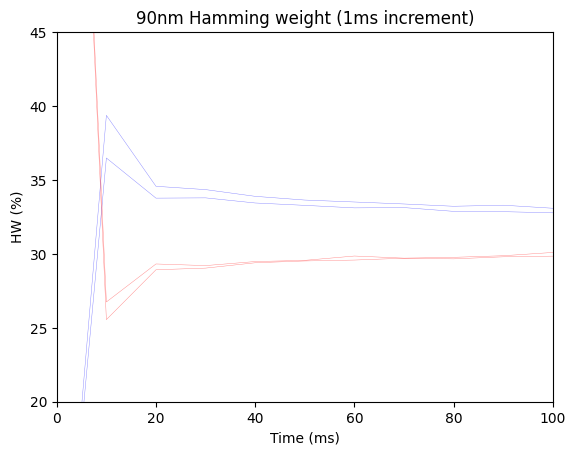

In [78]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import os

img_size = 256
img_bits = img_size * img_size
img_words = img_bits // 16

d = "../serial-data/consistent-july-2"
fig, ax = plt.subplots()

for f in os.listdir(d):
    if '800ms' not in f: 
        continue
    print(f)
    path = os.path.join(d, f)
    times = []
    weights = []
    with open(path, 'rb') as trials_file:
        iterations = 0
        while (delay := sa.file_seek_next_delay_line(trials_file)):
            sa.file_seek_next_data_dump(trials_file)
            try:
                weight = sa.file_hamming_weight(trials_file, img_words)
            except ValueError:
                break
            times.append(float(delay))
            weights.append(sa.percent(weight, img_bits))
    ax.plot(times, weights, alpha=0.8, color=('blue' if '0s' in f else 'red'), linewidth=0.3)
ax.set_xlim([0, 100])
ax.set_ylim([20, 45])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('HW (%)')
ax.set_title('90nm Hamming weight (1ms increment)')

256x256-0s-90nm-upto-20ms-1.txt
256x256-0s-90nm-upto-20ms-2.txt
256x256-0s-90nm-upto-20ms-3.txt
256x256-0s-90nm-upto-20ms-4.txt
256x256-0s-90nm-upto-20ms-5.txt
256x256-0s-90nm-upto-20ms-6.txt
256x256-0s-90nm-upto-20ms-7.txt
256x256-0s-90nm-upto-20ms-8.txt
256x256-0s-90nm-upto-20ms-9.txt
256x256-0s-90nm-upto-20ms-by-100us-1.txt
256x256-0s-90nm-upto-20ms-by-100us-2.txt
256x256-1s-90nm-upto-20ms-1.txt
256x256-1s-90nm-upto-20ms-2.txt
256x256-1s-90nm-upto-20ms-3.txt
256x256-1s-90nm-upto-20ms-4.txt
256x256-1s-90nm-upto-20ms-5.txt
256x256-1s-90nm-upto-20ms-6.txt
256x256-1s-90nm-upto-20ms-7.txt
256x256-1s-90nm-upto-20ms-8.txt
256x256-1s-90nm-upto-20ms-9.txt
256x256-1s-90nm-upto-20ms-by-200us-1.txt


Text(0.5, 1.0, '90nm Hamming weight (1ms increment)')

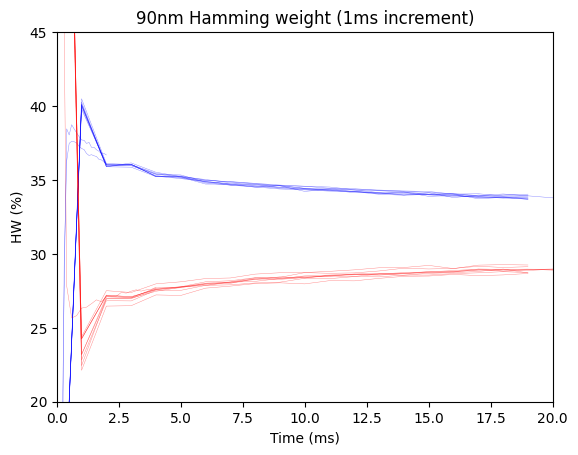

In [5]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import os

img_size = 256
img_bits = img_size * img_size
img_words = img_bits // 16
num_trials = 21

d = "../serial-data/consistent-july-2"
fig, ax = plt.subplots()

for f in os.listdir(d):
    if ('20ms' not in f):# or ('us' in f): 
        continue
    print(f)
    path = os.path.join(d, f)
    times = []
    weights = []
    with open(path, 'rb') as trials_file:
        iterations = 0
        while (delay := sa.file_seek_next_delay_line(trials_file)) and iterations < num_trials:
            iterations += 1
            sa.file_seek_next_data_dump(trials_file)
            try:
                weight = sa.file_hamming_weight(trials_file, img_words)
            except ValueError:
                break
            times.append(float(delay))
            weights.append(sa.percent(weight, img_bits))
    ax.plot(times, weights, alpha=0.5, color=('blue' if '0s' in f else 'red'), linewidth=0.3)
ax.set_xlim([0, 20])
ax.set_ylim([20, 45])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('HW (%)')
ax.set_title('90nm Hamming weight (1ms increment)')

256x256-0s-90nm-upto-3ms-1.txt
256x256-0s-90nm-upto-3ms-2.txt
256x256-0s-90nm-upto-3ms-3.txt
256x256-0s-90nm-upto-3ms-4.txt
256x256-0s-90nm-upto-3ms-5.txt
256x256-0s-90nm-upto-3ms-6.txt
256x256-0s-90nm-upto-3ms-7.txt
256x256-0s-90nm-upto-3ms-by-10us-1.txt
256x256-0s-90nm-upto-3ms-by-10us-2.txt
256x256-0s-90nm-upto-3ms-by-10us-3.txt
256x256-1s-90nm-upto-3ms-1.txt
256x256-1s-90nm-upto-3ms-2.txt
256x256-1s-90nm-upto-3ms-3.txt
256x256-1s-90nm-upto-3ms-4.txt
256x256-1s-90nm-upto-3ms-5.txt
256x256-1s-90nm-upto-3ms-6.txt
256x256-1s-90nm-upto-3ms-7.txt
256x256-1s-90nm-upto-3ms-by-10us-1.txt
256x256-1s-90nm-upto-3ms-by-10us-2.txt
256x256-1s-90nm-upto-3ms-by-10us-3.txt


Text(0.5, 1.0, '90nm Hamming weight (0.1ms increment)')

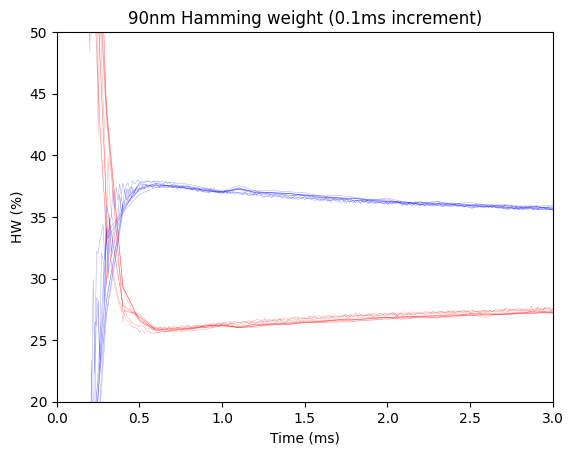

In [6]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import os

img_size = 256
img_bits = img_size * img_size
img_words = img_bits // 16

d = "../serial-data/consistent-july-2"
fig, ax = plt.subplots()

for f in os.listdir(d):
    if '3ms' not in f: 
        continue
    print(f)
    path = os.path.join(d, f)
    times = []
    weights = []
    with open(path, 'rb') as trials_file:
        iterations = 0
        while (delay := sa.file_seek_next_delay_line(trials_file)):
            iterations += 1
            sa.file_seek_next_data_dump(trials_file)
            try:
                weight = sa.file_hamming_weight(trials_file, img_words)
            except ValueError:
                break
            times.append(float(delay))
            weights.append(sa.percent(weight, img_bits))
    ax.plot(times, weights, alpha=0.4, color=('blue' if '0s' in f else 'red'), linewidth=0.3)
ax.set_xlim([0, 3])
ax.set_ylim([20, 50])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('HW (%)')
ax.set_title('90nm Hamming weight (0.1ms increment)')

256x256-0s-90nm-upto-3ms-by-10us-1.txt
256x256-0s-90nm-upto-3ms-by-10us-2.txt
256x256-0s-90nm-upto-3ms-by-10us-3.txt
256x256-1s-90nm-upto-3ms-by-10us-1.txt
256x256-1s-90nm-upto-3ms-by-10us-2.txt
256x256-1s-90nm-upto-3ms-by-10us-3.txt


Text(0.5, 1.0, '90nm Hamming weight (10us increment)')

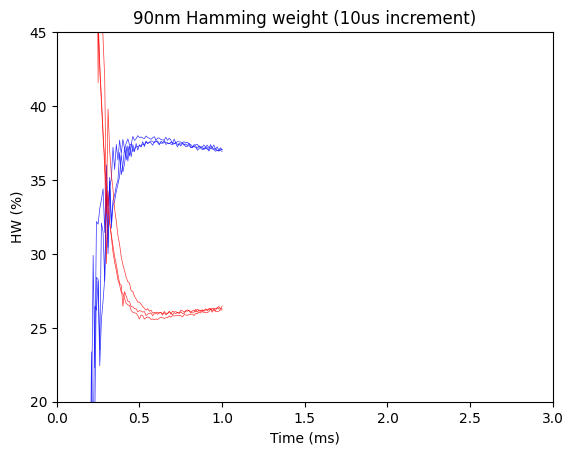

In [16]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import os

img_size = 256
img_bits = img_size * img_size
img_words = img_bits // 16

d = "../serial-data/consistent-july-2"
fig, ax = plt.subplots()

for f in os.listdir(d):
    if '10us' not in f: 
        continue
    print(f)
    path = os.path.join(d, f)
    times = []
    weights = []
    with open(path, 'rb') as trials_file:
        while (delay := sa.file_seek_next_delay_line(trials_file)):
            sa.file_seek_next_data_dump(trials_file)
            try:
                weight = sa.file_hamming_weight(trials_file, img_words)
            except ValueError:
                break
            if (float(delay) > 1.0): break
            times.append(float(delay))
            weights.append(sa.percent(weight, img_bits))
    ax.plot(times, weights, alpha=0.8, color=('blue' if '0s' in f else 'red'), linewidth=0.5)
ax.set_xlim([0, 3])
ax.set_ylim([20, 45])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('HW (%)')
ax.set_title('90nm Hamming weight (10us increment)')

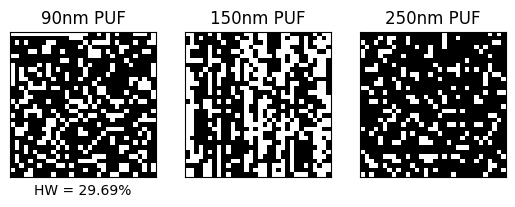

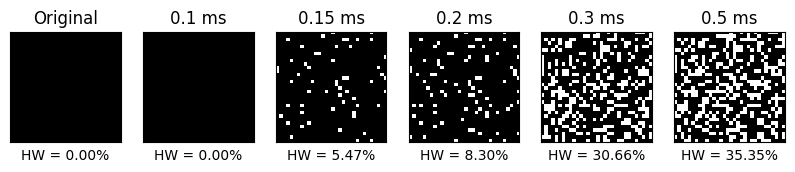

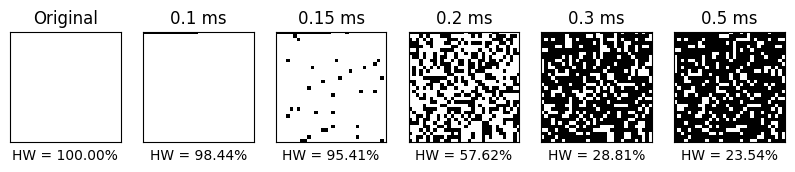

In [148]:
import serial_analysis as sa
import matplotlib.pyplot as plt

all_0s = "all-zeros-256x256.txt"
all_1s = "all-ones-256x256.txt"

img_dim = 32
img_bits = img_dim * img_dim
img_words = img_bits // 16

# Show PUF images...

fig, axs = plt.subplots(1, 3)
axs[0].set_title('90nm PUF')
hw = sa.percent(sa.file_hamming_weight("../chips/inh1/puf/gold-PUF.txt", img_words), img_bits)
axs[0].set_xlabel(f"HW = {hw:0.2f}%")
show_binary_image_from_file(axs[0], "../chips/inh1/puf/gold-PUF.txt", img_dim, img_dim)

axs[1].set_title('150nm PUF')
show_binary_image_from_file(axs[1], "../chips/inh2/puf/gold-PUF.txt", img_dim, img_dim)

axs[2].set_title('250nm PUF')
show_binary_image_from_file(axs[2], "../chips/inh3/puf/gold-PUF.txt", img_dim, img_dim)


images_90nm_0s = sa.remanence_experiment_get_images("../serial-data/consistent-july-2/256x256-0s-90nm-upto-3ms-by-10us-1.txt", img_dim, img_dim)
images_90nm_1s = sa.remanence_experiment_get_images("../serial-data/consistent-july-2/256x256-1s-90nm-upto-3ms-by-10us-1.txt", img_dim, img_dim)
# print(images_90nm_0s_1.keys())
times = [0.1, 0.15, 0.2, 0.3, 0.500]
fig_image_remanence_row(all_0s, img_dim, img_dim, images_90nm_0s, times)[0].set_figwidth(10)
fig_image_remanence_row(all_1s, img_dim, img_dim, images_90nm_1s, times)[0].set_figwidth(10)

## I fiddled with the Arduino code
I now suspect that the Arduino code could be the problem with the weird data.
I changed the `turnOffSRAM` and `turnOnSRAM` functions so that they enable/disable the chip in a different order.

Now, let's compare a new power-up memory state with the old PUF from before the change...

In [1]:
import serial_analysis as sa

sa.bit_diff_files("../serial-data/consistent-july-2/powerup-90nm.txt", "../chips/inh1/puf/gold-PUF.txt")
sa.file_xor_basic("../serial-data/consistent-july-2/powerup-90nm.txt", "../chips/inh1/puf/gold-PUF.txt", "temp-XOR.txt", sa.NUM_WORDS)

Comparing bits from data files '../serial-data/consistent-july-2/powerup-90nm.txt' and '../chips/inh1/puf/gold-PUF.txt'...
* Hamming weight for "../serial-data/consistent-july-2/powerup-90nm.txt": 1,314,341 (31.336%)
* Hamming weight for "../chips/inh1/puf/gold-PUF.txt": 1,299,610 (30.985%)
* Number of bits different between the two files: 239,189 which is 5.703% of the given total size


../serial-data/consistent-july-2/256x256-0s-90nm-upto-20ms-by-100us-2.txt
../serial-data/consistent-july-2/256x256-1s-90nm-upto-20ms-by-100us-1.txt


Text(0.5, 1.0, '90nm Hamming weight (10us increment)')

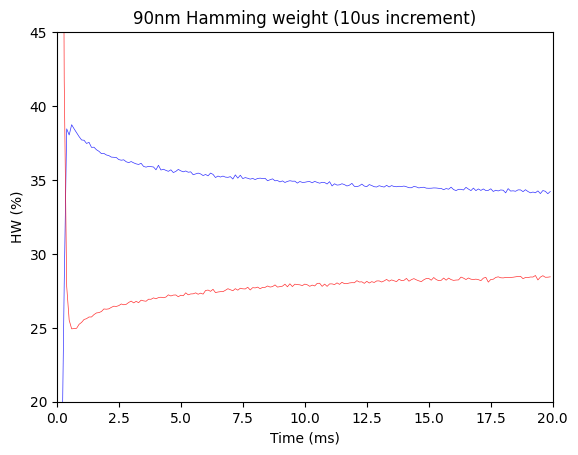

In [19]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import os

img_size = 256
img_bits = img_size * img_size
img_words = img_bits // 16

fig, ax = plt.subplots()
for f in ["../serial-data/consistent-july-2/256x256-0s-90nm-upto-20ms-by-100us-2.txt",
          "../serial-data/consistent-july-2/256x256-1s-90nm-upto-20ms-by-100us-1.txt"]:
    print(f)
    times = []
    weights = []
    with open(f, 'rb') as trials_file:
        while (delay := sa.file_seek_next_delay_line(trials_file)):
            sa.file_seek_next_data_dump(trials_file)
            try:
                weight = sa.file_hamming_weight(trials_file, img_words)
            except ValueError:
                break
            times.append(float(delay))
            weights.append(sa.percent(weight, img_bits))
    ax.plot(times, weights, alpha=0.8, color=('blue' if '0s' in f else 'red'), linewidth=0.5)
ax.set_xlim([0, 20])
ax.set_ylim([20, 45])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('HW (%)')
ax.set_title('90nm Hamming weight (10us increment)')

capture 19 1000ms PUFs for 90nm again to see if the Arduino code change affected it

In [15]:
import serial_analysis as sa
sa.create_gold_puf_v2(19, r"../chips\inh1\puf\startup-19-captures-1000ms-2.txt", r"../chips\inh1\puf\gold-PUF-3.txt")

- loading file "../chips\inh1\puf\startup-19-captures-1000ms-2.txt"
Processing capture #1 in the file
Processing capture #2 in the file
Processing capture #3 in the file
Processing capture #4 in the file
Processing capture #5 in the file
Processing capture #6 in the file
Processing capture #7 in the file
Processing capture #8 in the file
Processing capture #9 in the file
Processing capture #10 in the file
Processing capture #11 in the file
Processing capture #12 in the file
Processing capture #13 in the file
Processing capture #14 in the file
Processing capture #15 in the file
Processing capture #16 in the file
Processing capture #17 in the file
Processing capture #18 in the file
Processing capture #19 in the file
saving result to output file...
done


In [18]:
sa.bit_diff_files(r"../chips\inh1\puf\gold-PUF.txt", r"../chips\inh1\puf\gold-PUF-3.txt")
sa.bit_diff_files(r"../chips\inh1\puf\gold-PUF-2.txt", r"../chips\inh1\puf\gold-PUF-3.txt")

Comparing bits from data files '../chips\inh1\puf\gold-PUF.txt' and '../chips\inh1\puf\gold-PUF-3.txt'...
* Hamming weight for "../chips\inh1\puf\gold-PUF.txt": 1,299,610 (30.985%)
* Hamming weight for "../chips\inh1\puf\gold-PUF-3.txt": 1,306,006 (31.138%)
* Number of bits different between the two files: 112,784 which is 2.689% of the given total size
Comparing bits from data files '../chips\inh1\puf\gold-PUF-2.txt' and '../chips\inh1\puf\gold-PUF-3.txt'...
* Hamming weight for "../chips\inh1\puf\gold-PUF-2.txt": 1,312,842 (31.301%)
* Hamming weight for "../chips\inh1\puf\gold-PUF-3.txt": 1,306,006 (31.138%)
* Number of bits different between the two files: 93,236 which is 2.223% of the given total size


93236

## Fixing data loss above by using the very last measured PU_read as PU_ref in an experiment plot

num_trials=5, IMG_NUM_WORDS=1024, num_skip_words=0
Loading trials for all-1s on 90nm chip...
temp-pu_ref.txt
Loading trials for all-1s on 150nm chip...
temp-pu_ref.txt
Loading trials for all-1s on 250nm chip...
temp-pu_ref.txt


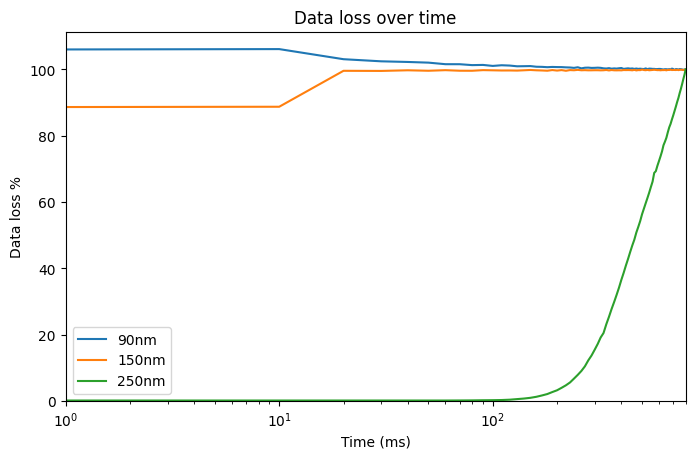

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import serial_analysis as sa

CHIP_NAMES = { 90: 'inh1', 150: 'inh2', 250: 'inh3' }
IMG_NUM_WORDS = (128 * 128) // 16

num_trials = 5
num_skip_words = 0
print(f"{num_trials=}, {IMG_NUM_WORDS=}, {num_skip_words=}")

fig, ax = plt.subplots()

for i, node_size in enumerate((90, 150, 250)):
    # puf_file_name = f"../chips/{CHIP_NAMES[node_size]}/puf-old/gold-PUF.txt"
    puf_file_name = f"temp-pu_ref.txt"

    # Use the last time data in the trials to create a temporary "PUF" reference file
    votes = np.zeros(IMG_NUM_WORDS * 16, 'int')
    for trial_num in range(1, num_trials + 1):
        with open(f"../serial-data/consistent-july/{node_size}nm-1s-upto-800ms-{trial_num}.txt", 'rb') as ref_in:
            try:
                sa.file_seek_trial_for_delay(ref_in, 800)
            except ValueError:
                ref_in.seek(0, 0)
                sa.file_seek_trial_for_delay(ref_in, 790)
            for ii in range(IMG_NUM_WORDS):
                word = sa.file_read_next_hex4(ref_in)
                for jj in range(16):
                    if word & (1 << jj):
                        votes[ii * 16 + jj] += 1
    # write trial'ss majority vote to temp file
    with open(puf_file_name, 'w') as temp_ref_out:
        for ii in range(IMG_NUM_WORDS):
            word = 0
            for jj in range(16):
                if votes[ii * 16 + jj] > (num_trials // 2):
                    word |= (1 << jj)
            print(sa.hex4(word), file=temp_ref_out)

    # print(puf_file_name)
    ## Run for all-1s data and all-0s data
    # for bit in (0, 1):
    for bit in (1,):
        print(f"Loading trials for all-{bit}s on {node_size}nm chip...")
        original_data_file = 'all-ones-128x128.txt' if (bit == 1) else 'all-zeros-128x128.txt'

        print(f"{puf_file_name}")

        # Get data losses from multiple trial runs
        data_losses = []
        try:
            for trial_num in range(1, num_trials + 1):
                capture_file_name = f"../serial-data/consistent-july/{node_size}nm-{bit}s-upto-800ms-{trial_num}.txt"
                data_loss_list = sa.files_data_loss_percent(original_data_file, capture_file_name, puf_file_name, IMG_NUM_WORDS, num_skip_words)
                data_losses.append(data_loss_list)
                # print(data_loss_list)
        except FileNotFoundError:
            print(f"(!) Skipping missing data file for {node_size}nm all {bit}s (trial #{trial_num})")
            continue

        assert(len(data_losses) == num_trials)

        # Sum up the data losses
        sum_data_losses = dict()
        for trials_losses in data_losses:
            for time, loss in trials_losses:
                sum_data_losses[time] = sum_data_losses.get(time, 0.0) + loss

        # print(sum_data_losses)

        # Turn trials loss sum into average
        avg_data_losses = { time: (val / num_trials) for (time, val) in sum_data_losses.items() }
        data = np.array(tuple(sorted(avg_data_losses.items())))
        # ax.plot(data[:,0], data[:,1], '-' if bit else '--', label=f"{node_size}nm {bit}s", color=f"C{i}")
        ax.plot(data[:,0], data[:,1], '-' if bit else '--', label=f"{node_size}nm", color=f"C{i}")

# ax.set_title(f"Data loss over time ({num_trials} trial average)")
ax.set_title(f"Data loss over time")
fig.set_figwidth(8)
# fig.set_figheight(12)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Data loss %")
ax.set_xlim([1, 800])
ax.set_ylim([0, None])
ax.set_xscale('log')
ax.legend()

../serial-data/256x256/65nm-logrange-1s.txt
../serial-data/256x256/90nm-A-logrange-1s-2.txt
../serial-data/256x256/150nm-1s-custom.txt
../serial-data/256x256/250nm-1s-custom.txt


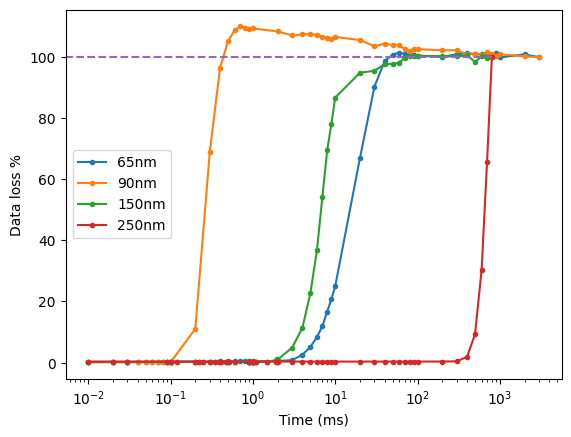

In [92]:
import re
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

data_orig = r'128x128-all-1s.txt'
puf_temp_fname = 'temp-pu_ref.txt'
num_words = 1024

for node in (65, 90, 150, 250):
    fname = {
        65 : f'../serial-data/256x256/65nm-logrange-1s.txt',
        # 90: f'../serial-data/consistent-july/90nm-1s-custom-128x128-7.txt',
        # 90 : f'../serial-data/consistent-july/90nm-B-1s-custom-256x256.txt',
        90 : f'../serial-data/256x256/90nm-A-logrange-1s-2.txt',
        # 90 : f'../serial-data/512x512/90nm-A-0s-cumulative-by-200us.txt',
        150: f'../serial-data/256x256/150nm-1s-custom.txt',
        250: f'../serial-data/256x256/250nm-1s-custom.txt',
        }[node]
    print(fname)
    data_points = []
    with open(fname, 'rb') as file_in:
        puf_data = None
        puf_time = None
        # find latest/last trial
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = float(ms)#int(ms) + (int(us) / 1000)
                sa.file_seek_next_data_dump(file_in)
                if (puf_time is None) or (t > puf_time):
                    puf_time = t
                    puf_data = sa.file_read_hex4_dump_as_words(file_in, num_words)
        assert (puf_data is not None)
        sa.file_write_words(puf_temp_fname, puf_data)
        file_in.seek(0, 0)
        # compare all other memory dumps to the last trial
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                # ms = re.search(r'(\d+\.\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = int(ms) + (int(us) / 1000)
                # t = float(ms)
                sa.file_seek_next_data_dump(file_in)
                with open(puf_temp_fname, 'rb') as pu_ref_file:
                    with open(data_orig, 'rb') as orig_file:
                        trial_data_loss = sa.files_read_and_calc_data_loss(file_in, orig_file, pu_ref_file, num_words)
                        data_points.append((t, trial_data_loss))
    data_points = np.array(sorted(data_points))
    ax.plot(data_points[:,0], data_points[:,1], '.-', label=f'{node}nm')

# ax.set_xlim([0.01, 800])
ax.set_xscale('log')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Data loss %')
ax.plot([0, 800], [100, 100], '--')
# ax.set_title('Data loss over time for all-1s image')
ax.legend()
# fig.set_figwidth(10)
# fig.set_figheight(8)

Collect 256x256 all-0s bit-flip times bitmaps for 250nm chip:

In [14]:
import numpy as np
import serial_analysis as sa
bit_initially_one = True
original_file = '../scripts/all-zeros-256x256.txt'
imgs = []
for i in range(1, 1 + 9):
    try:
        fname = f'../serial-data/256x256/250nm-0s-custom-{i}.txt'
        print(fname)
        with open(fname, 'rb') as file_in:
            flip_array = sa.file_find_bit_flips_v2(original_file, file_in, 4096)
            # print(f"- min flip time = {np.min(flip_array)}")
            # print(f"- max flip time = {np.max(flip_array)}")
            print(f"- mean flip time = {np.mean(flip_array):0.1f}")
            img = np.reshape(flip_array, (256, 256))
            imgs.append(img)
    except (InterruptedError, KeyboardInterrupt) as e:
        break

../serial-data/256x256/250nm-0s-custom-1.txt
- mean flip time = 316.2
../serial-data/256x256/250nm-0s-custom-2.txt
- mean flip time = 300.3
../serial-data/256x256/250nm-0s-custom-3.txt
- mean flip time = 300.9
../serial-data/256x256/250nm-0s-custom-4.txt
- mean flip time = 289.0
../serial-data/256x256/250nm-0s-custom-5.txt
- mean flip time = 288.4
../serial-data/256x256/250nm-0s-custom-6.txt
- mean flip time = 289.3
../serial-data/256x256/250nm-0s-custom-7.txt
- mean flip time = 288.1
../serial-data/256x256/250nm-0s-custom-8.txt
- mean flip time = 289.9
../serial-data/256x256/250nm-0s-custom-9.txt
- mean flip time = 285.9


(0.0, 800.0)

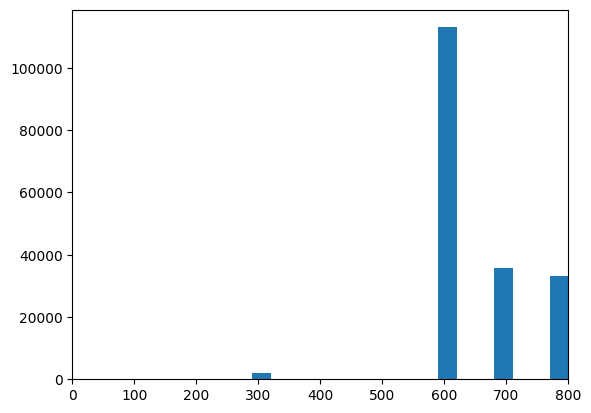

In [18]:
import matplotlib.pyplot as plt
stack = np.array(imgs)
flat = np.reshape(stack, (-1,))
flat = np.delete(flat, np.argwhere(flat == -1))
flat = np.delete(flat, np.argwhere(flat == 0))
flat = np.delete(flat, np.argwhere(flat > 800))
plt.hist(flat, bins=20)
# plt.gca().set_yscale('log')
plt.gca().set_xlim([0, 800])

now, combine the collected bitmaps into an average bitmap image:

(9, 256, 256)
(256, 256)


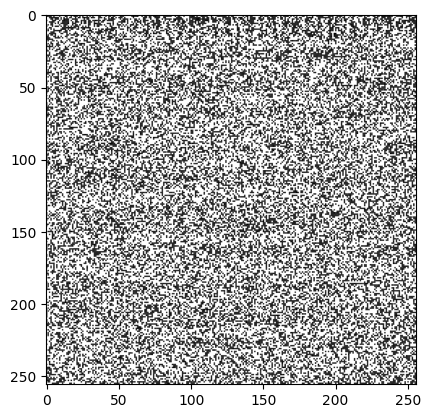

In [54]:
import matplotlib.pyplot as plt
stack = np.array(imgs)
print(stack.shape)
avg_img = np.mean(stack, axis=0)
# avg_img[avg_img == -1] = 4000
print(avg_img.shape)
plt.imshow(avg_img, cmap='gray')
plt.imsave("IMAGE-AVERAGE-OUT.png", avg_img, cmap='gray')

In [37]:
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
t = 400
with open('../serial-data/256x256/150nm-0s-full.txt', 'rb') as f:
    sa.file_seek_trial_for_delay(f, t)
    data = sa.convert_words_to_image(sa.file_read_hex4_dump_as_words(f, 4096), 256, 256)
    plt.imsave('temp-image.png', data, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: '../serial-data/256x256/150nm-0s-full.txt'

../serial-data/256x256/65nm-custom-0s-2.txt
../serial-data/256x256/90nm-A-custom-full-0s.txt
../serial-data/256x256/150nm-custom-full-0s.txt
../serial-data/256x256/250nm-custom-full-0s.txt


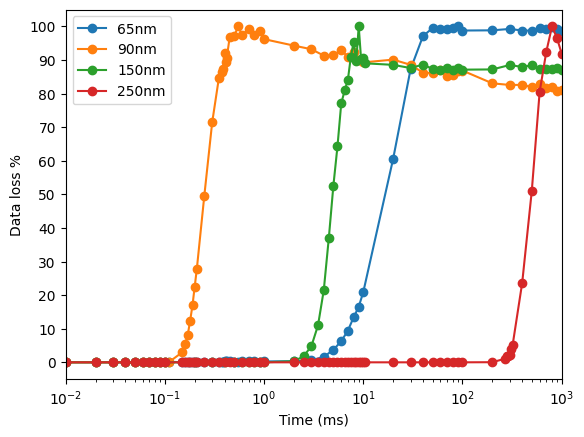

In [6]:
import re
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

data_orig = r'256x256-all-0s.txt'
puf_temp_fname = 'temp-pu_ref.txt'
num_words = 1024

for nm_i, node in enumerate((65,90,150,250)):
    fnames = {
        65: f'../serial-data/256x256/65nm-custom-0s-2.txt',
        90 : f'../serial-data/256x256/90nm-A-custom-full-0s.txt',
        150: f'../serial-data/256x256/150nm-custom-full-0s.txt',
        250: f'../serial-data/256x256/250nm-custom-full-0s.txt',
        }
    fname = fnames[node]
    print(fname)
    with open(fname, 'rb') as file_in:
        puf_data = None
        puf_time = None
        # find the latest/last trial and use as temporary reference to find the peak data loss value relative to it
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = float(ms)#int(ms) + (int(us) / 1000)
                sa.file_seek_next_data_dump(file_in)
                if (puf_time is None) or (t > puf_time):
                    puf_time = t
                    puf_data = sa.file_read_hex4_dump_as_words(file_in, num_words)
        assert (puf_data is not None)
        sa.file_write_words(puf_temp_fname, puf_data)
        file_in.seek(0, 0)
        # compare all other memory dumps to the last trial, and find the MAX
        peak_loss = None
        peak_time = None
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                # ms = re.search(r'(\d+\.\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = int(ms) + (int(us) / 1000)
                # t = float(ms)
                sa.file_seek_next_data_dump(file_in)
                with open(puf_temp_fname, 'rb') as pu_ref_file:
                    with open(data_orig, 'rb') as orig_file:
                        offset_before = file_in.tell()
                        trial_data_loss = sa.files_read_and_calc_data_loss(file_in, orig_file, pu_ref_file, num_words)
                        if peak_loss is None or trial_data_loss > peak_loss:
                            offset_after = file_in.tell()
                            peak_time = t
                            peak_loss = trial_data_loss
                            file_in.seek(offset_before, 0)
                            puf_data = sa.file_read_hex4_dump_as_words(file_in, num_words)
                            file_in.seek(offset_after, 0)
        sa.file_write_words(puf_temp_fname, puf_data)
        file_in.seek(0, 0)
        # compare all other memory dumps to the max data loss trial
        data_points = []
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                # ms = re.search(r'(\d+\.\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = int(ms) + (int(us) / 1000)
                # t = float(ms)
                sa.file_seek_next_data_dump(file_in)
                with open(puf_temp_fname, 'rb') as pu_ref_file:
                    with open(data_orig, 'rb') as orig_file:
                        trial_data_loss = sa.files_read_and_calc_data_loss(file_in, orig_file, pu_ref_file, num_words)
                        data_points.append((t, trial_data_loss))
    data_points = np.array(sorted(data_points))
    # c = { 90: 'r', 150: 'b', 250: 'k' }[node]
    ax.plot(data_points[:,0], data_points[:,1], f'C{nm_i}-o', label=f'{node}nm')#, mfc='none')

ax.set_xlim([0.01, 1000])
ax.set_ylim([-5, 105])
ax.set_yticks(range(0, 110, 10))
ax.set_xscale('log')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Data loss %')
# ax.plot([0, 200], [100, 100], '--')
# ax.set_title('Data loss over time for all-1s image')
ax.legend()
# fig.set_figwidth(10)
# fig.set_figheight(8)

../serial-data/256x256/65nm-logrange-1s.txt
../serial-data/256x256/90nm-A-logrange-1s.txt
../serial-data/256x256/150nm-logrange-1s.txt
../serial-data/256x256/250nm-logrange-1s.txt


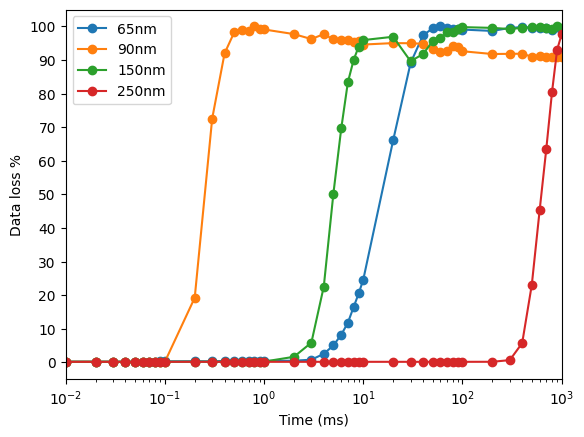

In [87]:
import re
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

data_orig = r'256x256-all-1s.txt'
puf_temp_fname = 'temp-pu_ref.txt'
num_words = 1024
fnames = {
    # 65: f'../serial-data/256x256/65nm-custom-1s-2.txt',
    # 90 : f'../serial-data/256x256/90nm-A-custom-full-1s.txt',
    # 150: f'../serial-data/256x256/150nm-custom-full-1s.txt',
    # 250: f'../serial-data/256x256/250nm-custom-full-1s.txt',
    65: "../serial-data/256x256/65nm-logrange-1s.txt",
    90: "../serial-data/256x256/90nm-A-logrange-1s.txt",
    150: "../serial-data/256x256/150nm-logrange-1s.txt",
    250: "../serial-data/256x256/250nm-logrange-1s.txt",
    }
for nm_i, node in enumerate((65,90,150,250)):
    fname = fnames[node]
    print(fname)
    with open(fname, 'rb') as file_in:
        puf_data = None
        puf_time = None
        # find the latest/last trial and use as temporary reference to find the peak data loss value relative to it
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = float(ms)#int(ms) + (int(us) / 1000)
                sa.file_seek_next_data_dump(file_in)
                if (puf_time is None) or (t > puf_time):
                    puf_time = t
                    puf_data = sa.file_read_hex4_dump_as_words(file_in, num_words)
        assert (puf_data is not None)
        sa.file_write_words(puf_temp_fname, puf_data)
        file_in.seek(0, 0)
        # compare all other memory dumps to the last trial, and find the MAX
        peak_loss = None
        peak_time = None
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                # ms = re.search(r'(\d+\.\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = int(ms) + (int(us) / 1000)
                # t = float(ms)
                sa.file_seek_next_data_dump(file_in)
                with open(puf_temp_fname, 'rb') as pu_ref_file:
                    with open(data_orig, 'rb') as orig_file:
                        offset_before = file_in.tell()
                        trial_data_loss = sa.files_read_and_calc_data_loss(file_in, orig_file, pu_ref_file, num_words)
                        if peak_loss is None or trial_data_loss > peak_loss:
                            offset_after = file_in.tell()
                            peak_time = t
                            peak_loss = trial_data_loss
                            file_in.seek(offset_before, 0)
                            puf_data = sa.file_read_hex4_dump_as_words(file_in, num_words)
                            file_in.seek(offset_after, 0)
        sa.file_write_words(puf_temp_fname, puf_data)
        file_in.seek(0, 0)
        # compare all other memory dumps to the max data loss trial
        data_points = []
        while line := file_in.readline().decode('ascii'):
            if 'cycling' in line and '+' in line:
            # if 'delay of' in line:
                ms = re.search(r'(\d+)ms', line).group(1)
                # ms = re.search(r'(\d+\.\d+)ms', line).group(1)
                us = re.search(r'(\d+)us', line).group(1)
                t = int(ms) + (int(us) / 1000)
                # t = float(ms)
                sa.file_seek_next_data_dump(file_in)
                with open(puf_temp_fname, 'rb') as pu_ref_file:
                    with open(data_orig, 'rb') as orig_file:
                        trial_data_loss = sa.files_read_and_calc_data_loss(file_in, orig_file, pu_ref_file, num_words)
                        data_points.append((t, trial_data_loss))
    data_points = np.array(sorted(data_points))
    # c = { 90: 'r', 150: 'b', 250: 'k' }[node]
    ax.plot(data_points[:,0], data_points[:,1], f'C{nm_i}-o', label=f'{node}nm')#, mfc='none')

ax.set_xlim([0.01, 1000])
ax.set_ylim([-5, 105])
ax.set_yticks(range(0, 110, 10))
ax.set_xscale('log')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Data loss %')
# ax.plot([0, 200], [100, 100], '--')
# ax.set_title('Data loss over time for all-1s image')
ax.legend()
# fig.set_figwidth(10)
# fig.set_figheight(8)

250nm 1s;250nm 0s;150nm 1s;150nm 0s;90nm 1s;90nm 0s;65nm 1s;65nm 0s;

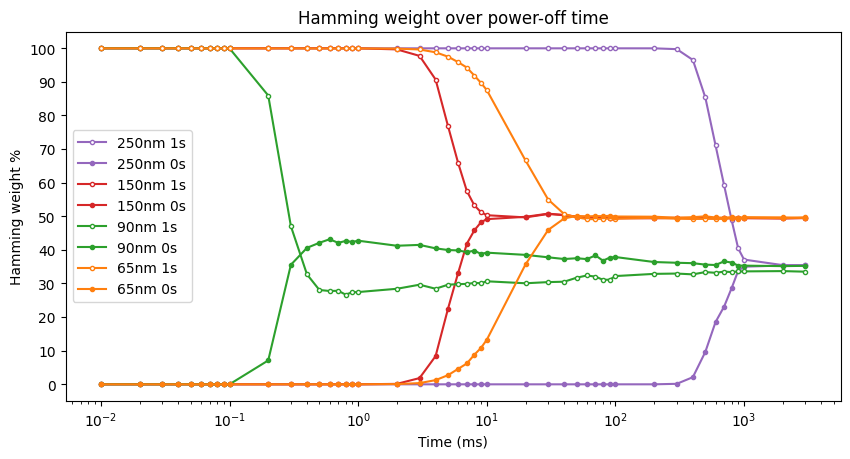

In [2]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import numpy as np
num_words = 4096
fig, ax = plt.subplots()
fs = [
    ("../serial-data/256x256/65nm-logrange-0s.txt", "65nm 0s"),
    ("../serial-data/256x256/65nm-logrange-1s.txt", "65nm 1s"),
    ("../serial-data/256x256/90nm-A-logrange-0s.txt", "90nm 0s"),
    # ("../serial-data/256x256/90nm-A-logrange-0s-2.txt", "90nm 0s (2)"),
    ("../serial-data/256x256/90nm-A-logrange-1s.txt", "90nm 1s"),
    # ("../serial-data/256x256/90nm-A-logrange-1s-2.txt", "90nm 1s (2)"),
    ("../serial-data/256x256/150nm-logrange-0s.txt", "150nm 0s"),
    ("../serial-data/256x256/150nm-logrange-1s.txt", "150nm 1s"),
    ("../serial-data/256x256/250nm-logrange-0s.txt", "250nm 0s"),
    ("../serial-data/256x256/250nm-logrange-1s.txt", "250nm 1s"),
]
for f, label in reversed(fs):
    # if '0s' in label:continue
    print(label, end=';')
    data = []
    # Read data dumps from the file 'f' and collect their Hamming weights
    with open(f , "rb") as file_in:
        try:
            while delay := sa.file_seek_next_delay_line(file_in):
                t = float(delay)
                sa.file_seek_next_data_dump(file_in)
                w = sa.file_hamming_weight(file_in, num_words)
                data.append((t, w))
        except ValueError:
            pass
    data = np.array(tuple(sorted(data)))
    # Choose plot color
    c = None
    if '65nm' in label: c = 'C1'
    if '90nm' in label: c = 'C2'
    if '150nm' in label: c = 'C3'
    if '250nm' in label: c = 'C4'
    # Plot based on bit 0 or 1...
    if '0s' in label:
        ax.plot(data[:,0], data[:,1] * (100/(num_words*16)), '.-', color=c, label=label)
    else:
        ax.plot(data[:,0], data[:,1] * (100/(num_words*16)), '.-', color=c, mfc='white', label=label)
# ax.set_xlim([0, 0.6])
ax.set_xscale('log')
ax.set_title('Hamming weight over power-off time')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Hamming weight %')
ax.set_yticks(range(0, 101, 10))
fig.set_figwidth(10)
ax.legend()

Below, we can see that the HW can randomly vary by several %, just randomly...

90nm B 0s, cycle=1s


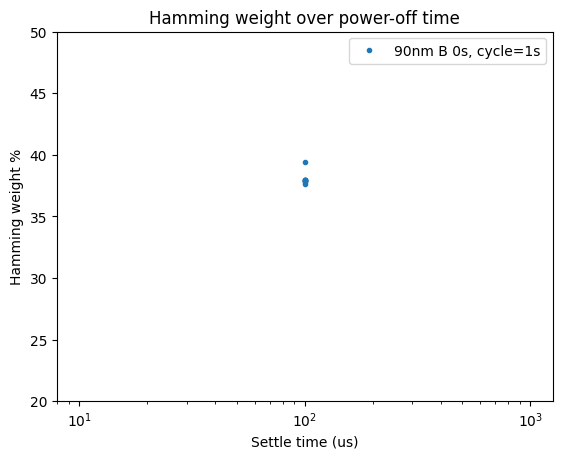

In [38]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import numpy as np
import re
num_words = 4096
fig, ax = plt.subplots()
fs = [
    # ("../serial-data/256x256/90nm-A-0s-1ms-settletime-test.txt", "90nm.A, 0s, cycle=1ms"),

    # ("../serial-data/256x256/90nm-B-0s-1ms-settletime-test2-1.txt", "90nm.B, 0s, cycle=1ms"),
    # ("../serial-data/256x256/90nm-B-0s-1ms-settletime-test2-2.txt", "90nm.B, 0s, cycle=1ms #2"),
    # ("../serial-data/256x256/90nm-B-1s-1ms-settletime-test.txt", "90nm.B, 1s, cycle=1ms"),
    # ("../serial-data/256x256/90nm-B-1s-1ms-settletime-test-2.txt", "90nm.B, 1s, cycle=1ms #2"),

    # ("../serial-data/256x256/90nm-A-0s-500us-settletime-test-1.txt", "90nm.A, 0s, cycle=500us, #1"),
    # ("../serial-data/256x256/90nm-A-0s-500us-settletime-test-2.txt", "90nm.A, 0s, cycle=500us, #2"),
    # ("../serial-data/256x256/90nm-A-0s-500us-settletime-test-3.txt", "90nm.A, 0s, cycle=500us, #3"),

    # ("../serial-data/256x256/90nm-B-0s-500us-settletime-test-1.txt", "90nm B 0s, cycle=500us, #1"),
    # ("../serial-data/256x256/90nm-B-0s-500us-settletime-test-2.txt", "90nm B 0s, cycle=500us, #2"),
    # ("../serial-data/256x256/90nm-B-0s-500us-settletime-test-3.txt", "90nm B 0s, cycle=500us, #3"),
    # ("../serial-data/256x256/90nm-B-0s-500us-settletime-test-4.txt", "90nm B 0s, cycle=500us, #4"),
    # ("../serial-data/256x256/90nm-B-0s-500us-settletime-test-5.txt", "90nm B 0s, cycle=500us, #5"),
    # ("../serial-data/256x256/90nm-B-0s-500us-settletime-test-6.txt", "90nm B 0s, cycle=500us, #6"),

    ("../serial-data/256x256/90nm-B-0s-1ms-settletime-same.txt", "90nm B 0s, cycle=1s"),
]
for f, label in reversed(fs):
    # if '0s' in label:continue
    print(label)
    data = []
    # Read data dumps from the file 'f' and collect their Hamming weights
    with open(f , "rb") as file_in:
        while line := file_in.readline().decode('ascii'):
            if 'Settle time' not in line:
                continue
            match = re.search(r'(\d+)[mu]s', line)
            t = float(match.group(1))
            if 'ms' in match.group(0): t *= 1000
            sa.file_seek_next_data_dump(file_in)
            w = sa.file_hamming_weight(file_in, num_words)
            data.append((t, w))
    data = np.array(tuple(sorted(data)))
    # Plot based on bit 0 or 1...
    if '0s' in label:
        ax.plot(data[:,0], data[:,1] * (100/(num_words*16)), '.', label=label)
    else:
        ax.plot(data[:,0], data[:,1] * (100/(num_words*16)), '.', mfc='white', label=label)
ax.set_xscale('log')
ax.set_title('Hamming weight over power-off time')
ax.set_xlabel('Settle time (us)')
ax.set_ylabel('Hamming weight %')
# ax.set_yticks(range(0, 101, 10))
ax.set_yticks(range(20, 51, 5))
ax.legend()

<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ihals\AppData\Local\Temp\ipykernel_10760\1454484334.py:36: SyntaxWarning: invalid escape sequence '\d'
  '''


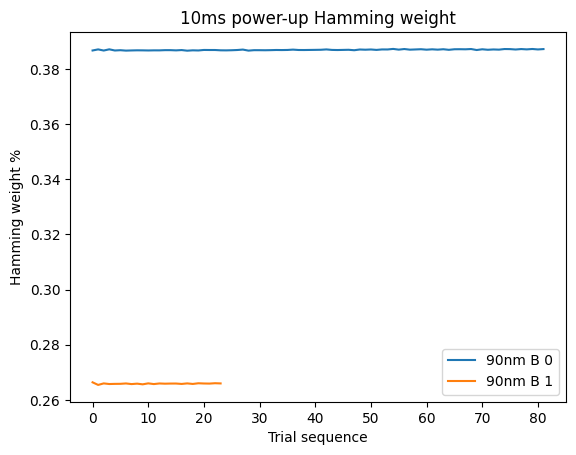

In [27]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import re

bins = 20
alpha = 0.3

fig, ax = plt.subplots()

with open("../serial-data/256x256/90nm-B-hw-10ms-4.txt", "rb") as file_in:
    hw_values = []
    count = 0
    for line in file_in.readlines():
        line = line.decode('ascii')
        if "Hamming weight: " in line:
            if count != 0: # skip the first one
                hw = int(re.search(r"(\d+)", line).group(1))
                hw_values.append(hw / sa.NUM_BITS)
            count += 1
    # ax.hist(hw_values, bins, label="90nm A, 1", alpha=alpha)
    ax.plot(range(len(hw_values)), hw_values, label="90nm B 0")
    
with open("../serial-data/256x256/90nm-B-1s-hw-10ms-1.txt", "rb") as file_in:
    hw_values = []
    count = 0
    for line in file_in.readlines():
        line = line.decode('ascii')
        if "Hamming weight: " in line:
            if count != 0: # skip the first one
                hw = int(re.search(r"(\d+)", line).group(1))
                hw_values.append(hw / sa.NUM_BITS)
            count += 1
    # ax.hist(hw_values, bins, label="90nm B, 1", alpha=alpha)
    ax.plot(range(len(hw_values)), hw_values, label="90nm B 1")

'''
with open("../serial-data/256x256/90nm-B-hw-10ms-2.txt", "rb") as file_in:
    hw_values = []
    count = 0
    for line in file_in.readlines():
        line = line.decode('ascii')
        if "Hamming weight: " in line:
            if count != 0: # skip the first one
                hw = int(re.search(r"(\d+)", line).group(1))
                hw_values.append(hw / sa.NUM_BITS)
            count += 1
    # ax.hist(hw_values, bins, label="90nm B, 2", alpha=alpha)
    ax.plot(range(len(hw_values)), hw_values, '.', label="90nm B, 2")
'''

ax.set_title("10ms power-up Hamming weight")
ax.set_ylabel("Hamming weight %")
ax.set_xlabel("Trial sequence")
ax.legend()

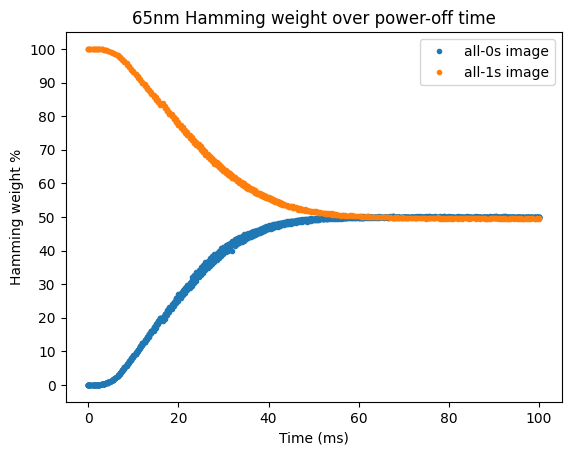

In [13]:
import serial_analysis as sa
import matplotlib.pyplot as plt
import numpy as np
num_words=4096
fig, ax = plt.subplots()
for b in '01':
    data = []
    with open(f"../serial-data/256x256/65nm-{b}s.txt", "rb") as file_in:
        try:
            while delay := sa.file_seek_next_delay_line(file_in):
                t = float(delay)
                sa.file_seek_next_data_dump(file_in)
                w = sa.file_hamming_weight(file_in, num_words)
                data.append((t, w))
        except ValueError:
            pass
    data = np.array(tuple(sorted(data)))
    ax.plot(data[:,0], data[:,1] * (100 / (num_words * 16)), '.', label=f"all-{b}s image")
# ax.set_xscale('log')
ax.set_title('65nm Hamming weight over power-off time')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Hamming weight %')
ax.set_yticks(range(0, 101, 10))
ax.legend()

## Investigating 65nm bit flip time distribution

original_file='256x256-all-0s.txt'
../serial-data/256x256/65nm-0s-upto-60ms-by-500us-1.txt
../serial-data/256x256/65nm-0s-upto-60ms-by-500us-2.txt
../serial-data/256x256/65nm-0s-upto-60ms-by-500us-3.txt
../serial-data/256x256/65nm-0s-upto-60ms-by-500us-4.txt
../serial-data/256x256/65nm-0s-upto-60ms-by-500us-5.txt
original_file='256x256-all-1s.txt'
../serial-data/256x256/65nm-1s-upto-60ms-by-500us-1.txt
../serial-data/256x256/65nm-1s-upto-60ms-by-500us-2.txt
../serial-data/256x256/65nm-1s-upto-60ms-by-500us-3.txt
../serial-data/256x256/65nm-1s-upto-60ms-by-500us-4.txt
../serial-data/256x256/65nm-1s-upto-60ms-by-500us-5.txt


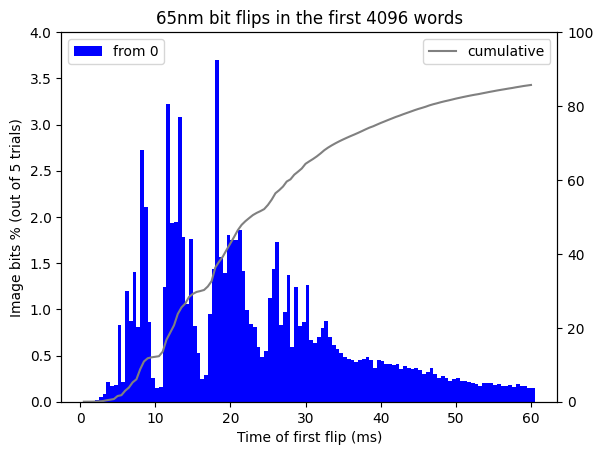

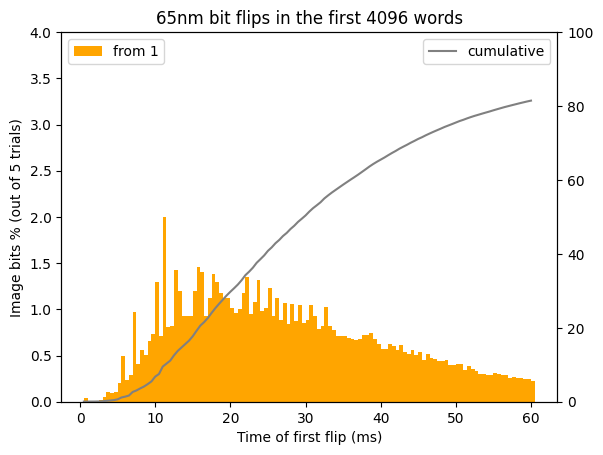

In [71]:
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

num_words = 4096
num_bits = num_words * 16
nm = 65
width = 0.500

num_trial_files = 5

for b in "01":
    fig, ax = plt.subplots()
    original_file = f"256x256-all-{b}s.txt"
    print(f"{original_file=}")

    all_flips = {}
    for n in range(num_trial_files):
        trial_file = f"../serial-data/256x256/{nm}nm-{b}s-upto-60ms-by-500us-{n+1}.txt"
        print(trial_file)

        flip_times = sa.file_find_bit_flips_count(original_file, trial_file, num_words)
        for t, count in flip_times.items():
            if not all_flips.get(t):
                all_flips[t] = 0
            all_flips[t] += count
    del all_flips[0.0]

    pairs = np.array(list(all_flips.items()))
    pairs[:,1] *= 100.0 / (num_bits * num_trial_files) # convert bit count to a percentage

    c = ["blue", "orange"]
    c = c[int(b)]
    ax.bar(pairs[:,0], pairs[:,1], width=width, align='edge', label=f"from {b}", color=c)
    ax2 = ax.twinx()
    ax2.plot(pairs[:,0], pairs[:,1].cumsum(), label="cumulative", color='gray')
    ax2.set_ylim([0, 100])

    ax.set_title(f"{nm}nm bit flips in the first {num_words} words")
    ax.set_xlabel("Time of first flip (ms)")
    ax.set_ylabel(f"Image bits % (out of {num_trial_files} trials)")
    ax.set_ylim([None, 4.0])

    ax.legend(loc='upper left')
    ax2.legend()

## 90nm bit flip distribution

original_file='scripts/256x256-all-0s.txt'
serial-data/256x256/90nm-0s-upto-1ms-by-10us-1.txt
serial-data/256x256/90nm-0s-upto-1ms-by-10us-2.txt
serial-data/256x256/90nm-0s-upto-1ms-by-10us-3.txt
serial-data/256x256/90nm-0s-upto-1ms-by-10us-4.txt
serial-data/256x256/90nm-0s-upto-1ms-by-10us-5.txt
original_file='scripts/256x256-all-1s.txt'
serial-data/256x256/90nm-1s-upto-1ms-by-10us-1.txt
serial-data/256x256/90nm-1s-upto-1ms-by-10us-2.txt
serial-data/256x256/90nm-1s-upto-1ms-by-10us-3.txt
serial-data/256x256/90nm-1s-upto-1ms-by-10us-4.txt
serial-data/256x256/90nm-1s-upto-1ms-by-10us-5.txt


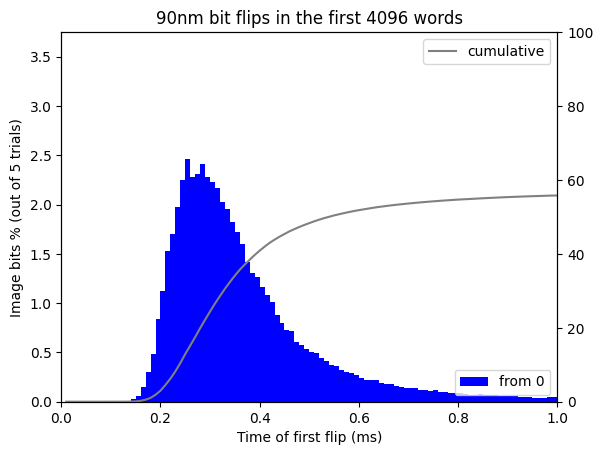

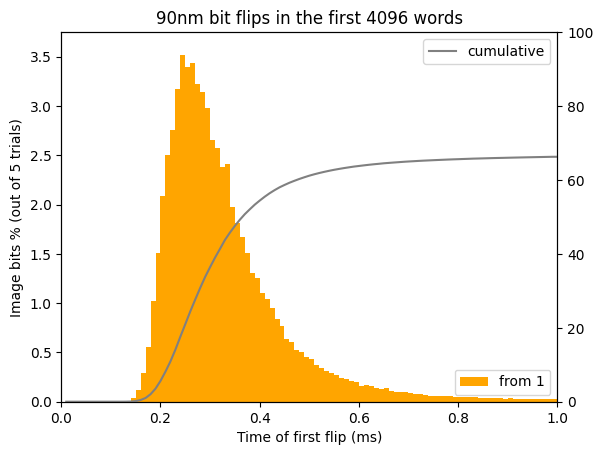

In [8]:
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

num_words = 4096
num_bits = num_words * 16
nm = 90
width= 0.010

num_trial_files = 5

for b in "01":
    fig, ax = plt.subplots()
    ax.set_xlim([None, 1])
    ax.set_ylim([None, 3.75])

    original_file = f"scripts/256x256-all-{b}s.txt"
    print(f"{original_file=}")

    all_flips = {}
    for n in range(num_trial_files):
        trial_file = f"serial-data/256x256/{nm}nm-{b}s-upto-1ms-by-10us-{n+1}.txt"
        print(trial_file)

        flip_times = sa.file_find_bit_flips_count(original_file, trial_file, num_words)
        for t, count in flip_times.items():
            if not all_flips.get(t):
                all_flips[t] = 0
            all_flips[t] += count
    del all_flips[0.0]

    pairs = np.array(list(all_flips.items()))
    pairs[:,1] *= 100.0 / (num_bits * num_trial_files) # convert bit count to a percentage

    c = ["blue", "orange"]
    c = c[int(b)]
    ax.bar(pairs[:,0], pairs[:,1], width=width, align='edge', label=f"from {b}", color=c)
    ax2 = ax.twinx()
    ax2.plot(pairs[:,0], pairs[:,1].cumsum(), label="cumulative", color='gray')
    ax2.set_ylim([0, 100])

    ax.set_title(f"{nm}nm bit flips in the first {num_words} words")
    ax.set_xlabel("Time of first flip (ms)")
    ax.set_ylabel(f"Image bits % (out of {num_trial_files} trials)")
    ax.legend(loc='lower right')
    ax2.legend()

original_file='scripts/256x256-all-0s.txt'
serial-data/256x256/150nm-0s-upto-15ms-by-50us-1.txt
serial-data/256x256/150nm-0s-upto-15ms-by-50us-2.txt
serial-data/256x256/150nm-0s-upto-15ms-by-50us-3.txt
serial-data/256x256/150nm-0s-upto-15ms-by-50us-4.txt
serial-data/256x256/150nm-0s-upto-15ms-by-50us-5.txt
original_file='scripts/256x256-all-1s.txt'
serial-data/256x256/150nm-1s-upto-15ms-by-50us-1.txt
serial-data/256x256/150nm-1s-upto-15ms-by-50us-2.txt
serial-data/256x256/150nm-1s-upto-15ms-by-50us-3.txt
serial-data/256x256/150nm-1s-upto-15ms-by-50us-4.txt
serial-data/256x256/150nm-1s-upto-15ms-by-50us-5.txt


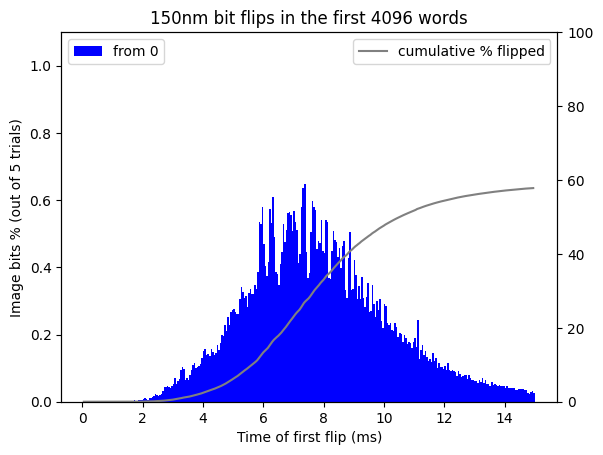

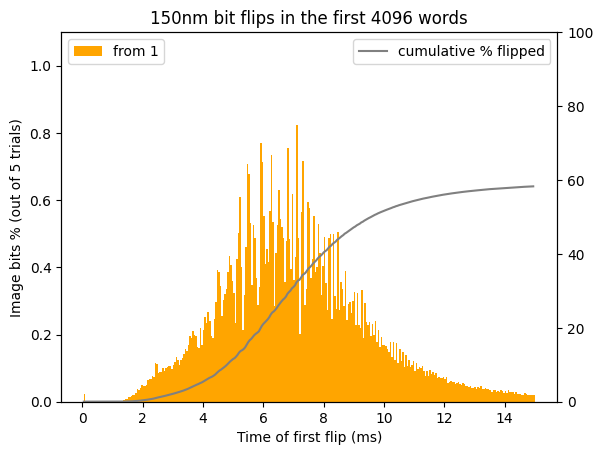

In [5]:
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

num_words = 4096
num_bits = num_words * 16
nm = 150
width= 0.050

num_trial_files = 5

for b in "01":
    fig, ax = plt.subplots()
    ax.set_ylim([None, 1.1])

    original_file = f"scripts/256x256-all-{b}s.txt"
    print(f"{original_file=}")

    all_flips = {}
    for n in range(num_trial_files):
        trial_file = f"serial-data/256x256/{nm}nm-{b}s-upto-15ms-by-50us-{n+1}.txt"
        print(trial_file)

        flip_times = sa.file_find_bit_flips_count(original_file, trial_file, num_words)
        for t, count in flip_times.items():
            if not all_flips.get(t):
                all_flips[t] = 0
            all_flips[t] += count
    del all_flips[0.0]

    pairs = np.array(list(all_flips.items()))
    pairs[:,1] *= 100.0 / (num_bits * num_trial_files) # convert bit count to a percentage

    c = ["blue", "orange"]
    c = c[int(b)]
    ax.bar(pairs[:,0], pairs[:,1], width=width, align='edge', label=f"from {b}", color=c)
    ax2 = ax.twinx()
    ax2.plot(pairs[:,0], pairs[:,1].cumsum(), label=r"cumulative % flipped", color='gray')
    ax2.set_ylim([0, 100])

    ax.set_title(f"{nm}nm bit flips in the first {num_words} words")
    ax.set_xlabel("Time of first flip (ms)")
    ax.set_ylabel(f"Image bits % (out of {num_trial_files} trials)")
    ax.legend(loc='upper left')
    ax2.legend()

original_file='scripts/256x256-all-0s.txt'


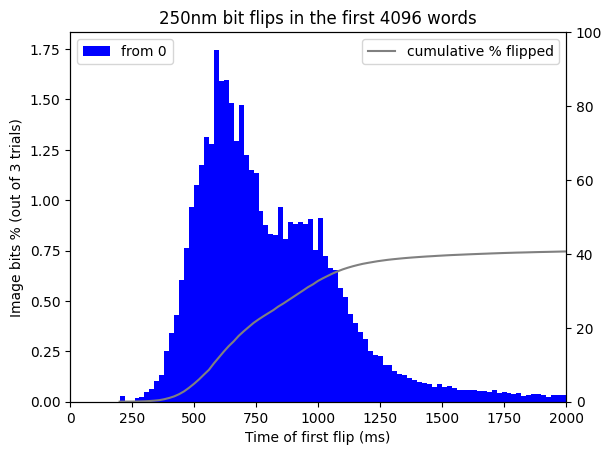

In [23]:
import serial_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

num_words = 4096
num_bits = num_words * 16
nm = 250
width= 20.0 # milliseconds

num_trial_files = 4

# Iterate Values for: 0 -> all-0's, 1 -> all-1's reference image.
for b in "0":
    fig, ax = plt.subplots()
    # ax.set_ylim([None, 1.1])
    ax.set_xlim([None, 2000])

    original_file = f"scripts/256x256-all-{b}s.txt"
    print(f"{original_file=}")

    all_flips = {}
    for n in range(num_trial_files):
        trial_file = f"serial-data/256x256/{nm}nm-{b}s-from-200ms-to-2500ms-by-20ms-{n+1}.txt"
        # print(trial_file)

        flip_times = sa.file_find_bit_flips_count(original_file, trial_file, num_words)
        for t, count in flip_times.items():
            if not all_flips.get(t):
                all_flips[t] = 0
            all_flips[t] += count

    pairs = np.array(list(all_flips.items()))
    pairs[:,1] *= 100.0 / (num_bits * num_trial_files) # convert bit count to a percentage

    # print(list(pairs[:,0]))

    c = ["blue", "orange"]
    c = c[int(b)]
    ax.bar(pairs[:,0], pairs[:,1], width=width, align='edge', label=f"from {b}", color=c)
    ax2 = ax.twinx()
    ax2.plot(pairs[:,0], pairs[:,1].cumsum(), label=r"cumulative % flipped", color='gray')
    ax2.set_ylim([0, 100])

    ax.set_title(f"{nm}nm bit flips in the first {num_words} words")
    ax.set_xlabel("Time of first flip (ms)")
    ax.set_ylabel(f"Image bits % (out of {num_trial_files} trials)")
    ax.legend(loc='upper left')
    ax2.legend()